In [ ]:
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from MazeSim_OneFrame_New import MazeSimulator
from itertools import count
from DQNAgent_OneFrame_New import DeepQNetwork_OneFrame, experience_buffer

settings = {
    'objects': [
        'friend',
        'enemy',
    ],
    'colors': {
        'hero':   'yellow',
        'friend': 'green',
        'enemy':  'red',
    },
    'object_reward': {
        'obstacle': -100,
        'wall': -100,
    },
    'hero_bounces_off_walls': False,
    'enemy_move':True,
    'world_size': (900,500),
    'hero_initial_position': [450, 250],
    'hero_initial_speed':    [0,   0],
    'end_position':          [750, 450],
    "maximum_speed":         [50, 50],
    "enemy_max_speed":       [50, 50],
    "object_radius": 30.0,
    "hero_radius": 10,
    "num_objects": {
        "friend" : 0,
        "enemy" :  20,
    },
    "num_observation_lines" : 200,
    "observation_line_length": 200,
    "laser_buffer_length":1,
    "obstacle_tolerance":0.2,
    "delta_v": 50
}

In [ ]:
# some useful functions
def updateTargetGraph(tfVars,tau):
    total_vars = len(tfVars)
    op_holder = []
    for idx,var in enumerate(tfVars[0:total_vars/2]):
        op_holder.append(tfVars[idx+total_vars/2].assign((var.value()*tau) + ((1-tau)*tfVars[idx+total_vars/2].value())))
    return op_holder

def updateTarget(op_holder,sess):
    for op in op_holder:
        sess.run(op)
        
def processState(states, shape):
    return np.reshape(states, shape)

In [ ]:
# train parameters
batch_size = 32 #How many experiences to use for each training step.
update_freq = 4 #How often to perform a training step.
y = .99 #Discount factor on the target Q-values
startE = 1 #Starting chance of random action
endE = 0.1 #Final chance of random action
anneling_steps = 10000. #How many steps of training to reduce startE to endE.
num_episodes = 6000 #How many episodes of game environment to train network with.

pre_train_steps = 10000  #How many steps of random actions before training begins.
load_model = False #Whether to load a saved model.
#h_size = 512 #The size of the final convolutional layer before splitting it into Advantage and Value streams.
tau = 0.001 #Rate to update target network toward primary network
ob_size = settings['num_observation_lines']

In [ ]:
sim = MazeSimulator(settings)

tf.reset_default_graph()

mainQN = DeepQNetwork_OneFrame(ob_size, 5)
targetQN = DeepQNetwork_OneFrame(ob_size, 5)

init = tf.initialize_all_variables()

saver = tf.train.Saver(max_to_keep = 100)

trainables = tf.trainable_variables()

targetOps = updateTargetGraph(trainables, tau)
copyOps = updateTargetGraph(trainables, 1.0)

myBuffer = experience_buffer()

#Set the rate of random action decrease. 
e = startE
stepDrop = (startE - endE)/anneling_steps

#create lists to contain total rewards and steps per episode
jList = []
rList = []
QList = []
total_steps = 0

ShowInterval = 2
num_maxsteps = 5000

Ep: 3 TS: 304 ES: 85 TR: -45.7761767956 Q 127.529516691
Ep: 4 TS: 349 ES: 44 TR: -107.300099843 Q 127.399644505
Ep: 5 TS: 406 ES: 56 TR: -58.5989528238 Q 156.847840173
Ep: 6 TS: 421 ES: 14 TR: -96.5617989581 Q 135.943945748
Ep: 7 TS: 498 ES: 76 TR: -66.2336188039 Q 149.622341056
Ep: 8 TS: 541 ES: 42 TR: -85.2234262686 Q 140.472807566
Ep: 9 TS: 573 ES: 31 TR: -86.2939909684 Q 121.516762518
Ep: 10 TS: 695 ES: 121 TR: 8.56056555506 Q 144.462801468
Ep: 11 TS: 710 ES: 14 TR: -98.1749704966 Q 112.460729871
Ep: 12 TS: 767 ES: 56 TR: -86.3808772949 Q 133.717892238
Ep: 13 TS: 783 ES: 15 TR: -93.1130845056 Q 130.152170817
Ep: 14 TS: 832 ES: 48 TR: -63.7624154522 Q 129.599440575
Ep: 15 TS: 858 ES: 25 TR: -83.6872280094 Q 144.697984619
Ep: 16 TS: 889 ES: 30 TR: -81.4607765823 Q 114.650901794
Ep: 17 TS: 919 ES: 29 TR: -85.9459621872 Q 152.948642336
Ep: 18 TS: 940 ES: 20 TR: -91.2676072727 Q 139.220390701
Ep: 19 TS: 1075 ES: 134 TR: 13.3616118901 Q 127.803933613
Ep: 20 TS: 1099 ES: 23 TR: -90.531619

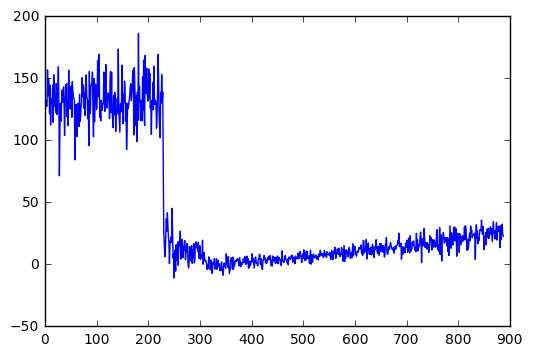

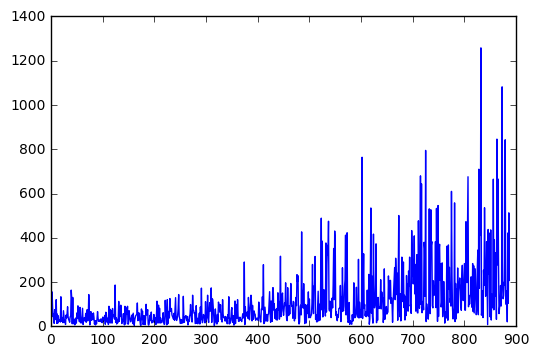

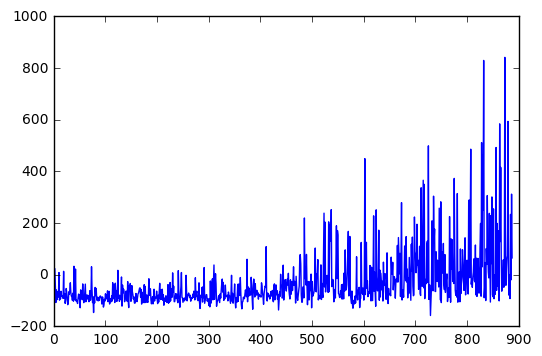

Ep: 888 TS: 100057 ES: 994 TR: 771.060460091 Q 32.5295132415
Ep: 889 TS: 100379 ES: 321 TR: 182.644229734 Q 29.1098620624
Ep: 890 TS: 100804 ES: 424 TR: 257.930215503 Q 28.1817612874
Ep: 891 TS: 100851 ES: 46 TR: -69.3619585367 Q 31.7572983244
Ep: 892 TS: 100934 ES: 82 TR: -75.4918750808 Q 19.13058169
Ep: 893 TS: 101008 ES: 73 TR: -46.8279357005 Q 25.4980785096
Ep: 894 TS: 101064 ES: 55 TR: -59.2036177139 Q 26.7243375301
Ep: 895 TS: 101371 ES: 306 TR: 151.080000494 Q 31.5500138515
Ep: 896 TS: 101825 ES: 453 TR: 237.023247797 Q 21.8842791645
Ep: 897 TS: 102418 ES: 592 TR: 348.388276596 Q 26.2696264315
Ep: 898 TS: 102845 ES: 426 TR: 232.673307879 Q 30.4680868272
Ep: 899 TS: 103192 ES: 346 TR: 218.253682746 Q 33.3938021334
Ep: 900 TS: 104011 ES: 818 TR: 633.501740728 Q 29.1868590027
Ep: 901 TS: 104111 ES: 99 TR: -30.7274989161 Q 30.4312582305
Ep: 902 TS: 104202 ES: 90 TR: -66.0731471192 Q 17.0870790164
Ep: 903 TS: 104322 ES: 119 TR: -21.5484851123 Q 22.1824002737
Ep: 904 TS: 104696 ES: 37

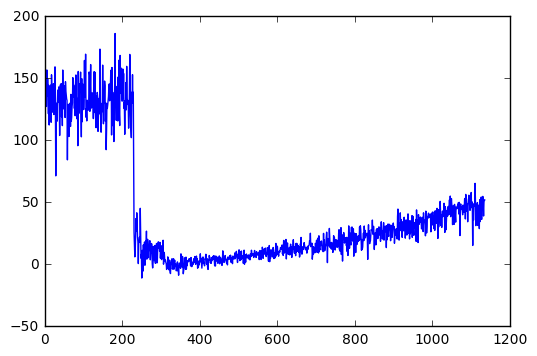

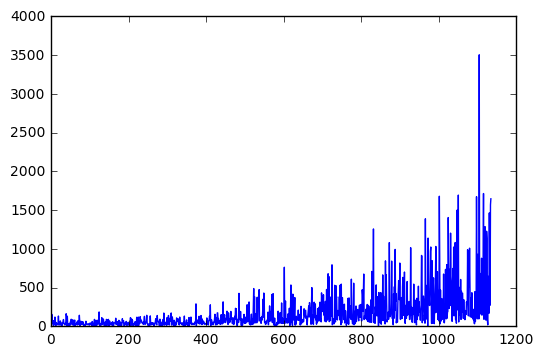

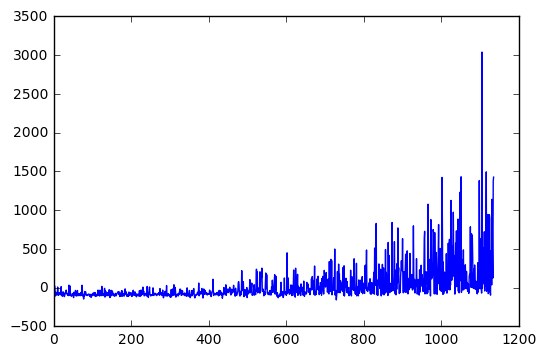

Ep: 1136 TS: 200119 ES: 405 TR: 125.608432614 Q 46.1198153264
Ep: 1137 TS: 201605 ES: 1485 TR: 1300.91865615 Q 52.1131642942
Ep: 1138 TS: 201890 ES: 284 TR: 159.431677915 Q 55.9042704492
Ep: 1139 TS: 201931 ES: 40 TR: -100.250825009 Q 27.1618850842
Ep: 1140 TS: 201995 ES: 63 TR: -74.1691921636 Q 47.0483578803
Ep: 1141 TS: 203106 ES: 1110 TR: 942.685256741 Q 58.8163685417
Ep: 1142 TS: 203428 ES: 321 TR: 190.320373195 Q 53.782544497
Ep: 1143 TS: 203570 ES: 141 TR: -13.4098423664 Q 41.9177269699
Ep: 1144 TS: 203728 ES: 157 TR: 35.8893309547 Q 52.6132276301
Ep: 1145 TS: 203835 ES: 106 TR: -33.2997237557 Q 41.0525433927
Ep: 1146 TS: 207793 ES: 3957 TR: 3572.73936352 Q 53.124296215
Ep: 1147 TS: 208329 ES: 535 TR: 383.323731458 Q 51.0232090634
Ep: 1148 TS: 208892 ES: 562 TR: 413.08109148 Q 57.2764054717
Ep: 1149 TS: 209288 ES: 395 TR: 211.088224379 Q 48.5264421365
Ep: 1150 TS: 209460 ES: 171 TR: 56.5391588641 Q 62.1386486048
Ep: 1151 TS: 210255 ES: 794 TR: 604.743991979 Q 52.0739485075
Ep: 11

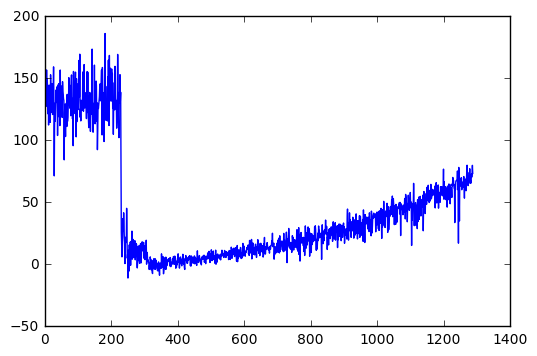

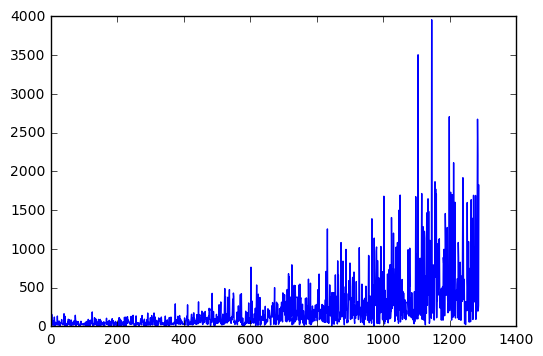

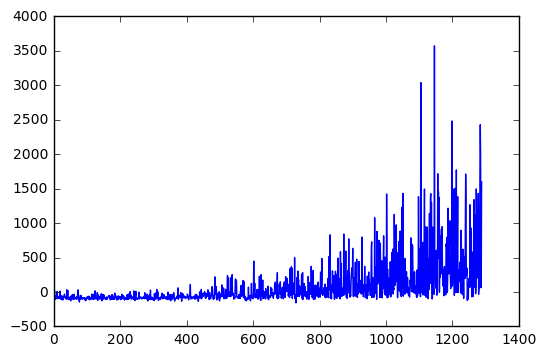

Ep: 1289 TS: 301508 ES: 1526 TR: 1206.66978529 Q 64.3808217654
Ep: 1290 TS: 301887 ES: 378 TR: 199.544563549 Q 61.0060261797
Ep: 1291 TS: 302785 ES: 897 TR: 701.849631728 Q 73.2956841404
Ep: 1292 TS: 303423 ES: 637 TR: 341.137819668 Q 67.0145358407
Ep: 1293 TS: 304131 ES: 707 TR: 505.571975021 Q 66.7553996547
Ep: 1294 TS: 304434 ES: 302 TR: 148.268710036 Q 74.8915188391
Ep: 1295 TS: 304709 ES: 274 TR: 153.520388714 Q 72.7414918571
Ep: 1296 TS: 304940 ES: 230 TR: 80.235351628 Q 65.52909526
Ep: 1297 TS: 306612 ES: 1671 TR: 1390.6273942 Q 71.8928017753
Ep: 1298 TS: 307883 ES: 1270 TR: 1087.27365377 Q 75.9987290112
Ep: 1299 TS: 308126 ES: 242 TR: 125.13648804 Q 83.2378850023
Ep: 1300 TS: 309567 ES: 1440 TR: 1158.07519566 Q 69.0099797053
Ep: 1301 TS: 310160 ES: 592 TR: 403.821216384 Q 66.6357988747
Ep: 1302 TS: 310878 ES: 717 TR: 413.335014337 Q 64.4127382147
Ep: 1303 TS: 311183 ES: 304 TR: 141.264876981 Q 66.743892405
Ep: 1304 TS: 312038 ES: 854 TR: 683.101867479 Q 73.5827593708
Ep: 1305 T

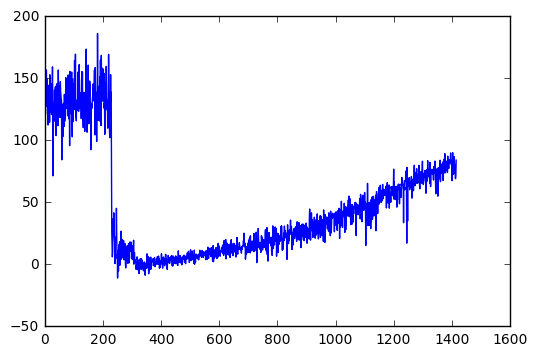

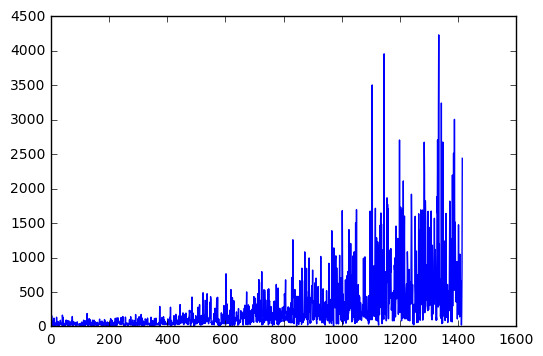

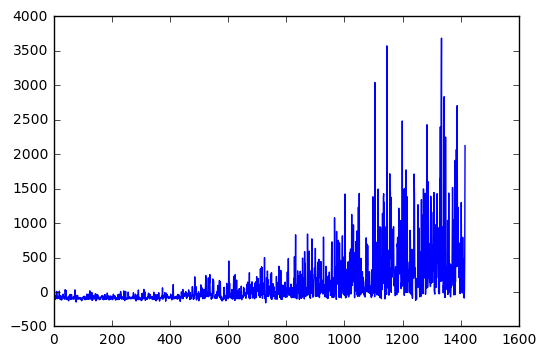

Ep: 1416 TS: 401083 ES: 1120 TR: 893.02240421 Q 81.9944583359
Ep: 1417 TS: 402843 ES: 1759 TR: 1460.06815071 Q 84.2747524693
Ep: 1418 TS: 403351 ES: 507 TR: 217.810650104 Q 67.8730895689
Ep: 1419 TS: 404013 ES: 661 TR: 484.766707041 Q 80.1638504411
Ep: 1420 TS: 405522 ES: 1508 TR: 1221.17306639 Q 82.6790288616
Ep: 1421 TS: 406540 ES: 1017 TR: 763.365419184 Q 75.664780677
Ep: 1422 TS: 406978 ES: 437 TR: 297.296194151 Q 88.4835978449
Ep: 1423 TS: 407407 ES: 428 TR: 292.26179443 Q 84.6407048011
Ep: 1424 TS: 407686 ES: 278 TR: 156.693808509 Q 90.0600664804
Ep: 1425 TS: 408163 ES: 476 TR: 299.242263649 Q 83.0871093631
Ep: 1426 TS: 408448 ES: 284 TR: 143.168225233 Q 79.0384800535
Ep: 1427 TS: 409250 ES: 801 TR: 585.784372153 Q 74.634927051
Ep: 1428 TS: 410635 ES: 1384 TR: 1198.12418632 Q 82.2196663005
Ep: 1429 TS: 410765 ES: 129 TR: -10.1293062735 Q 75.4365270378
Ep: 1430 TS: 411247 ES: 481 TR: 338.350802841 Q 80.7099347997
Ep: 1431 TS: 411566 ES: 318 TR: 135.637382347 Q 75.1616331624
Ep: 14

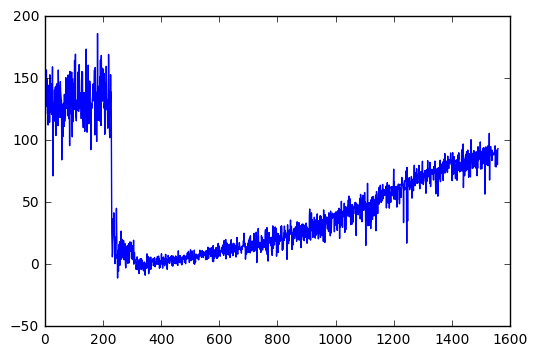

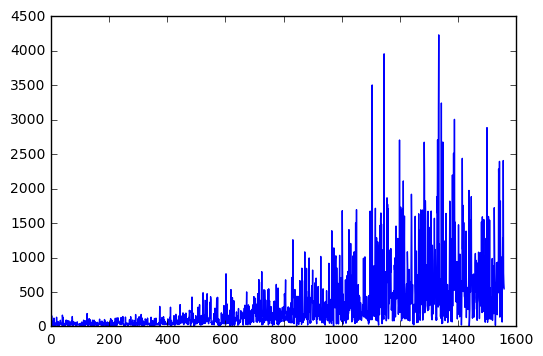

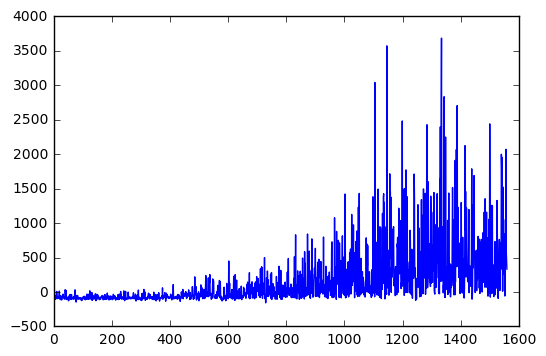

Ep: 1560 TS: 500090 ES: 1359 TR: 1108.48770089 Q 89.6541028881
Ep: 1561 TS: 503562 ES: 3471 TR: 2950.67770282 Q 91.5575132051
Ep: 1562 TS: 503767 ES: 204 TR: 62.9157008569 Q 99.7077362023
Ep: 1563 TS: 503845 ES: 77 TR: -39.1476791495 Q 105.955843542
Ep: 1564 TS: 503972 ES: 126 TR: 8.57396748697 Q 95.0138671663
Ep: 1565 TS: 504959 ES: 986 TR: 731.29518127 Q 83.608500382
Ep: 1566 TS: 505959 ES: 999 TR: 729.355943257 Q 83.9538821157
Ep: 1567 TS: 506101 ES: 141 TR: 11.1216233367 Q 94.0447000274
Ep: 1568 TS: 506545 ES: 443 TR: 305.865411324 Q 91.5668966237
Ep: 1569 TS: 507327 ES: 781 TR: 529.318581802 Q 91.1300121422
Ep: 1570 TS: 507489 ES: 161 TR: 12.7104376012 Q 84.3550061113
Ep: 1571 TS: 508821 ES: 1331 TR: 1033.99349655 Q 88.1385322592
Ep: 1572 TS: 509016 ES: 194 TR: 28.9470612584 Q 83.3233601125
Ep: 1573 TS: 510711 ES: 1694 TR: 1313.69715268 Q 86.7471800218
Ep: 1574 TS: 510842 ES: 130 TR: 3.57602451716 Q 97.0537769611
Ep: 1575 TS: 511356 ES: 513 TR: 319.91325365 Q 93.6029217815
Ep: 157

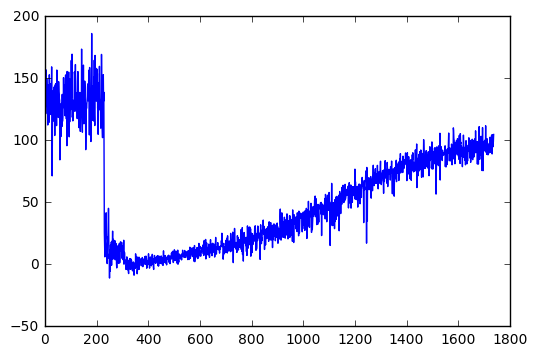

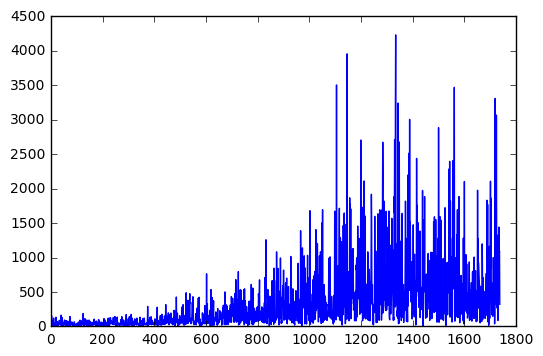

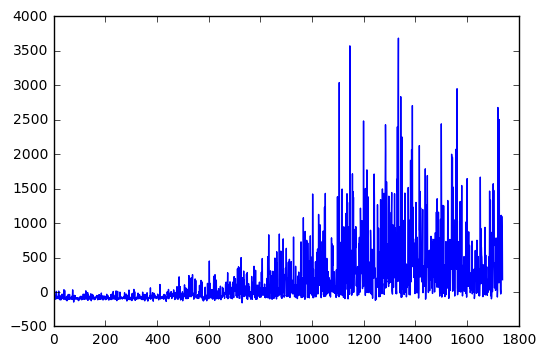

Ep: 1738 TS: 601334 ES: 1456 TR: 1198.05926998 Q 101.098758771
Ep: 1739 TS: 603703 ES: 2368 TR: 1958.08591138 Q 99.8981693017
Ep: 1740 TS: 604244 ES: 540 TR: 294.412107827 Q 93.5481910653
Ep: 1741 TS: 605414 ES: 1169 TR: 895.828763721 Q 94.4936506828
Ep: 1742 TS: 605559 ES: 144 TR: 20.7999305873 Q 98.2144448227
Ep: 1743 TS: 606156 ES: 596 TR: 363.906031986 Q 94.3245287738
Ep: 1744 TS: 607074 ES: 917 TR: 664.25787221 Q 100.820124854
Ep: 1745 TS: 607791 ES: 716 TR: 488.215235689 Q 96.4689930817
Ep: 1746 TS: 607960 ES: 168 TR: 21.2769809449 Q 103.768522573
Ep: 1747 TS: 608052 ES: 91 TR: -48.1923568595 Q 96.3923672687
Ep: 1748 TS: 608082 ES: 29 TR: -87.039034453 Q 97.5234376315
Ep: 1749 TS: 608380 ES: 297 TR: 159.581472904 Q 93.7595664291
Ep: 1750 TS: 609659 ES: 1278 TR: 1044.79576932 Q 96.5287846049
Ep: 1751 TS: 612732 ES: 3072 TR: 2459.32489309 Q 96.8349640219
Ep: 1752 TS: 614696 ES: 1963 TR: 1563.19893254 Q 97.7123598603
Ep: 1753 TS: 615220 ES: 523 TR: 348.82244578 Q 100.027724494
Ep: 1

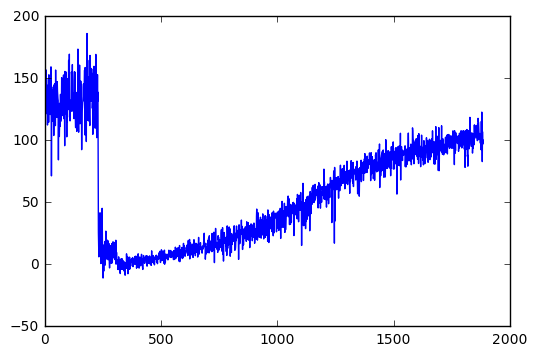

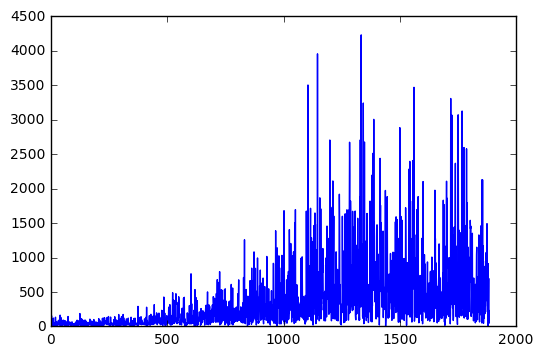

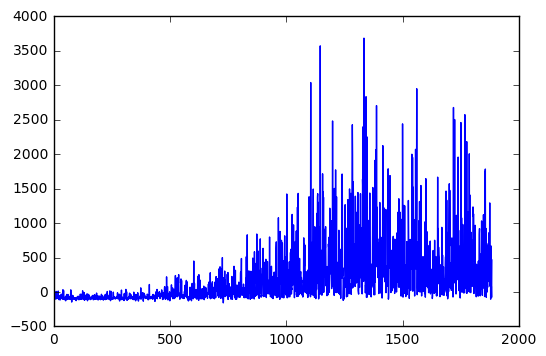

Ep: 1885 TS: 700065 ES: 1019 TR: 746.295367423 Q 104.639395689
Ep: 1886 TS: 700635 ES: 569 TR: 353.708455112 Q 97.3914992327
Ep: 1887 TS: 702974 ES: 2338 TR: 1908.23076152 Q 97.4911231558
Ep: 1888 TS: 703928 ES: 953 TR: 710.098917668 Q 100.949329858
Ep: 1889 TS: 704143 ES: 214 TR: 100.843130646 Q 112.354030859
Ep: 1890 TS: 704743 ES: 599 TR: 370.14749302 Q 94.3139914929
Ep: 1891 TS: 705344 ES: 600 TR: 361.817442373 Q 93.6214307213
Ep: 1892 TS: 706403 ES: 1058 TR: 765.1669621 Q 102.938160592
Ep: 1893 TS: 706623 ES: 219 TR: 37.2786836172 Q 103.255397553
Ep: 1894 TS: 707345 ES: 721 TR: 527.827450646 Q 100.469176275
Ep: 1895 TS: 708289 ES: 943 TR: 712.12614785 Q 102.972574546
Ep: 1896 TS: 708472 ES: 182 TR: 51.9171437458 Q 97.8975786482
Ep: 1897 TS: 709164 ES: 691 TR: 433.080794868 Q 97.6533720117
Ep: 1898 TS: 710202 ES: 1037 TR: 743.69494646 Q 97.1652612475
Ep: 1899 TS: 711582 ES: 1379 TR: 1123.61254631 Q 103.325755713
Ep: 1900 TS: 711632 ES: 49 TR: -77.4073696593 Q 98.6771494418
Ep: 1901

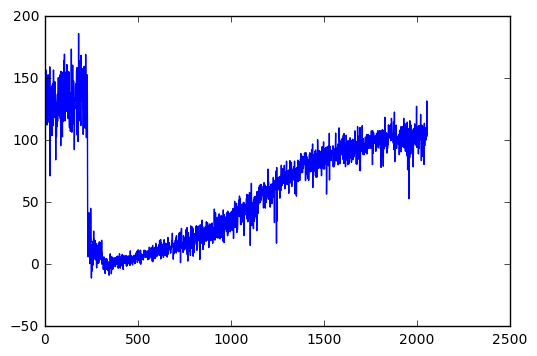

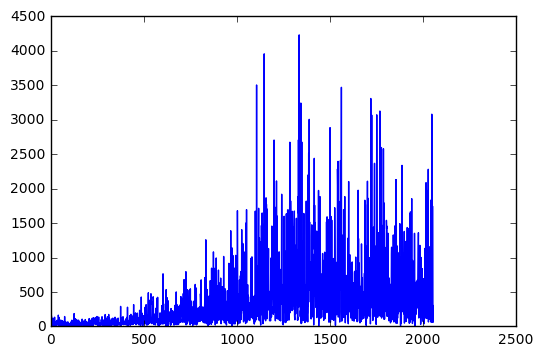

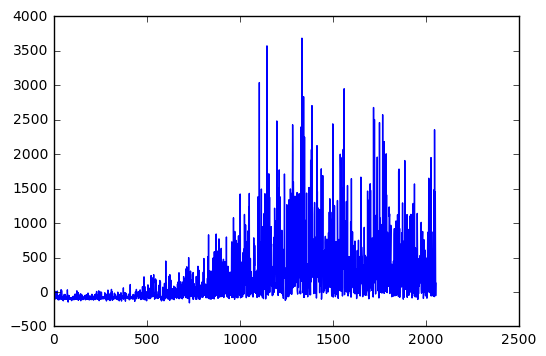

Ep: 2055 TS: 800817 ES: 1049 TR: 744.15866056 Q 113.316888882
Ep: 2056 TS: 801146 ES: 328 TR: 149.013260832 Q 96.5694216214
Ep: 2057 TS: 801537 ES: 390 TR: 165.611347104 Q 97.3336127238
Ep: 2058 TS: 802151 ES: 613 TR: 438.222212061 Q 109.125783771
Ep: 2059 TS: 802820 ES: 668 TR: 483.57947497 Q 111.54060281
Ep: 2060 TS: 802900 ES: 79 TR: -33.147917654 Q 95.4500882113
Ep: 2061 TS: 803075 ES: 174 TR: -14.5527160483 Q 76.108718241
Ep: 2062 TS: 803235 ES: 159 TR: 25.5196069603 Q 108.93330736
Ep: 2063 TS: 803613 ES: 377 TR: 227.57664301 Q 108.375635243
Ep: 2064 TS: 803872 ES: 258 TR: 98.349594802 Q 100.264876521
Ep: 2065 TS: 804369 ES: 496 TR: 220.660105238 Q 96.9048926568
Ep: 2066 TS: 804632 ES: 262 TR: 128.058737618 Q 116.575889587
Ep: 2067 TS: 805463 ES: 830 TR: 564.015639355 Q 94.3558429009
Ep: 2068 TS: 806491 ES: 1027 TR: 827.83775309 Q 109.092629025
Ep: 2069 TS: 806970 ES: 478 TR: 252.128616792 Q 106.792935132
Ep: 2070 TS: 807644 ES: 673 TR: 443.402747584 Q 102.209644413
Ep: 2071 TS: 8

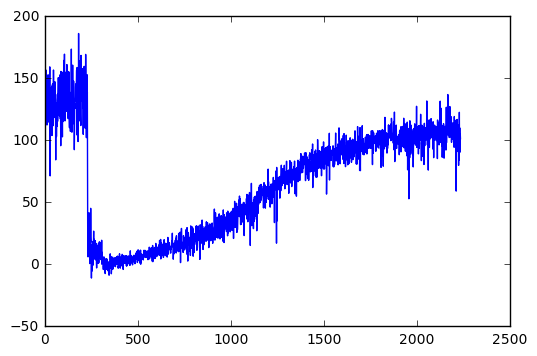

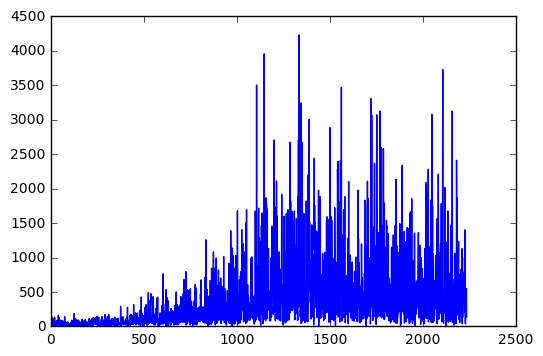

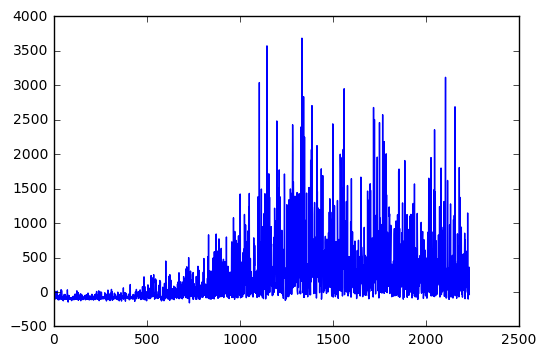

Ep: 2235 TS: 900113 ES: 1080 TR: 822.953729297 Q 116.754560566
Ep: 2236 TS: 900414 ES: 300 TR: 135.484342926 Q 103.373039322
Ep: 2237 TS: 900836 ES: 421 TR: 232.969684817 Q 121.962330145
Ep: 2238 TS: 902312 ES: 1475 TR: 1114.54290074 Q 109.697678739
Ep: 2239 TS: 902653 ES: 340 TR: 196.927010402 Q 122.391024421
Ep: 2240 TS: 902871 ES: 217 TR: 61.4349968336 Q 102.800214381
Ep: 2241 TS: 903530 ES: 658 TR: 453.439255246 Q 112.707455266
Ep: 2242 TS: 903671 ES: 140 TR: 23.9797697723 Q 117.821380697
Ep: 2243 TS: 903998 ES: 326 TR: 144.121428851 Q 108.792730372
Ep: 2244 TS: 904018 ES: 19 TR: -118.923569944 Q 121.443511963
Ep: 2245 TS: 904086 ES: 67 TR: -62.8648228864 Q 112.632505189
Ep: 2246 TS: 906980 ES: 2893 TR: 2359.26075052 Q 108.837320611
Ep: 2247 TS: 908435 ES: 1454 TR: 1230.16328248 Q 111.778852955
Ep: 2248 TS: 909519 ES: 1083 TR: 830.116440132 Q 106.628468941
Ep: 2249 TS: 909834 ES: 314 TR: 138.819468127 Q 106.407747053
Ep: 2250 TS: 910212 ES: 377 TR: 197.718916046 Q 108.039978402
Ep:

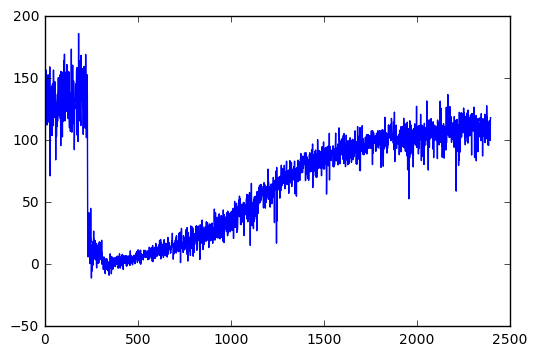

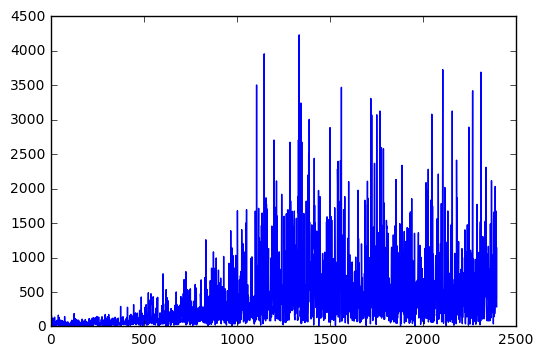

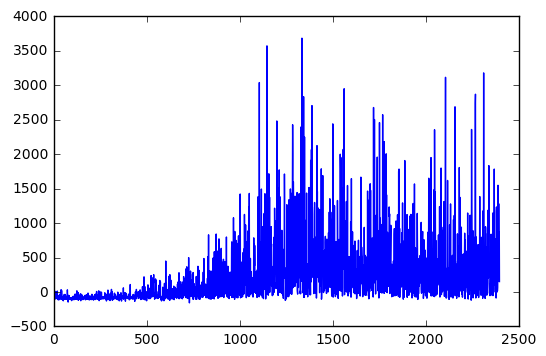

Ep: 2397 TS: 1000287 ES: 781 TR: 624.87244562 Q 118.69306495
Ep: 2398 TS: 1000363 ES: 75 TR: -63.213993012 Q 96.8540187709
Ep: 2399 TS: 1000492 ES: 128 TR: -51.6178186044 Q 100.395241134
Ep: 2400 TS: 1000663 ES: 170 TR: 10.971422971 Q 116.807008205
Ep: 2401 TS: 1002312 ES: 1648 TR: 1296.97723021 Q 113.229362956
Ep: 2402 TS: 1002488 ES: 175 TR: -6.62232463035 Q 108.562773645
Ep: 2403 TS: 1002891 ES: 402 TR: 196.569907252 Q 109.185835227
Ep: 2404 TS: 1003109 ES: 217 TR: 79.9181739402 Q 123.949458179
Ep: 2405 TS: 1004795 ES: 1685 TR: 1066.32220664 Q 109.905701428
Ep: 2406 TS: 1005169 ES: 373 TR: 219.625999416 Q 108.29561248
Ep: 2407 TS: 1005552 ES: 382 TR: 194.219507774 Q 106.684244182
Ep: 2408 TS: 1005689 ES: 136 TR: -94.2361034372 Q 94.043607519
Ep: 2409 TS: 1005891 ES: 201 TR: 31.9261721149 Q 121.820700574
Ep: 2410 TS: 1007219 ES: 1327 TR: 832.408164785 Q 105.493181375
Ep: 2411 TS: 1007384 ES: 164 TR: 14.623813029 Q 121.496928
Ep: 2412 TS: 1007634 ES: 249 TR: -24.7971365785 Q 100.03900

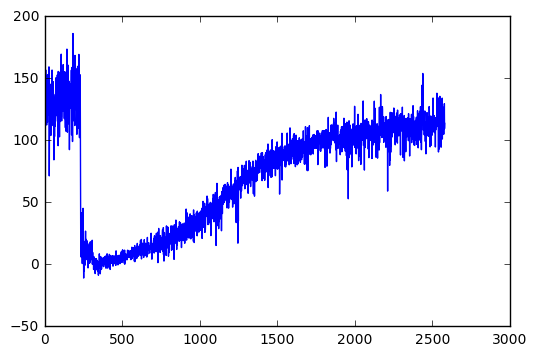

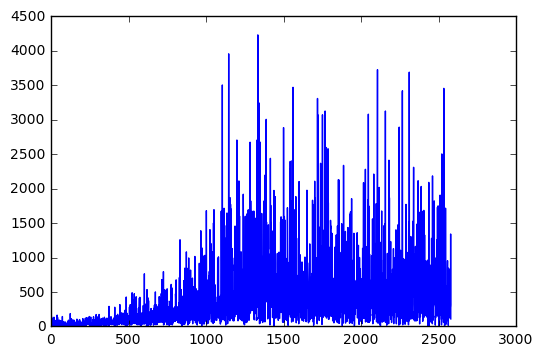

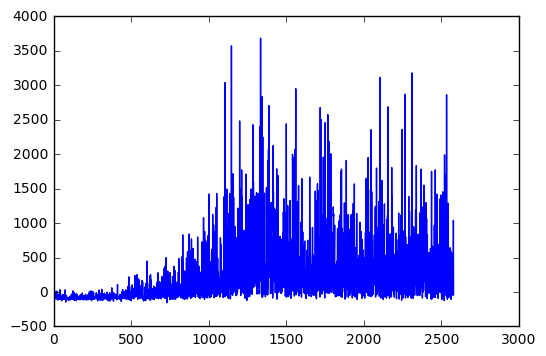

Ep: 2580 TS: 1100701 ES: 1958 TR: 1445.03917281 Q 108.730196399
Ep: 2581 TS: 1102660 ES: 1958 TR: 1606.9817052 Q 114.973271229
Ep: 2582 TS: 1102938 ES: 277 TR: 76.3278294329 Q 108.55101122
Ep: 2583 TS: 1103632 ES: 693 TR: 415.010554894 Q 110.676796504
Ep: 2584 TS: 1105370 ES: 1737 TR: 1397.03564593 Q 112.293926132
Ep: 2585 TS: 1105520 ES: 149 TR: 11.9942068595 Q 122.64162015
Ep: 2586 TS: 1106314 ES: 793 TR: 446.105752129 Q 105.968498345
Ep: 2587 TS: 1106478 ES: 163 TR: 35.9411586697 Q 123.648220132
Ep: 2588 TS: 1107532 ES: 1053 TR: 796.300908836 Q 114.817653029
Ep: 2589 TS: 1107600 ES: 67 TR: -84.4299057388 Q 98.2348599754
Ep: 2590 TS: 1107927 ES: 326 TR: 183.658885725 Q 110.360901248
Ep: 2591 TS: 1110461 ES: 2533 TR: 2016.86551668 Q 115.375734661
Ep: 2592 TS: 1111529 ES: 1067 TR: 734.889841238 Q 113.423014285
Ep: 2593 TS: 1112357 ES: 827 TR: 624.297945167 Q 118.442121403
Ep: 2594 TS: 1113157 ES: 799 TR: 536.152009854 Q 107.303305044
Ep: 2595 TS: 1113319 ES: 161 TR: 9.03652087688 Q 116

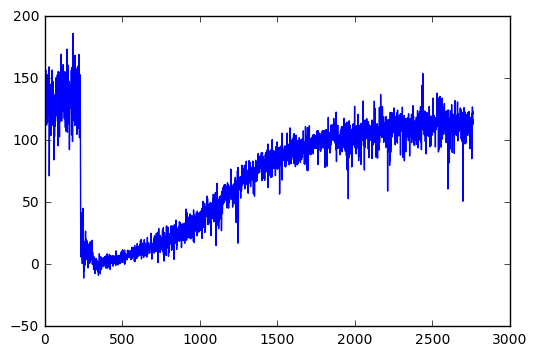

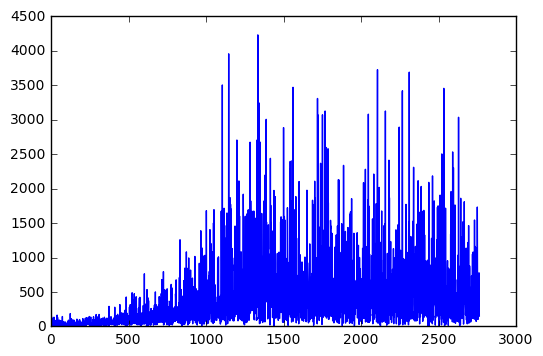

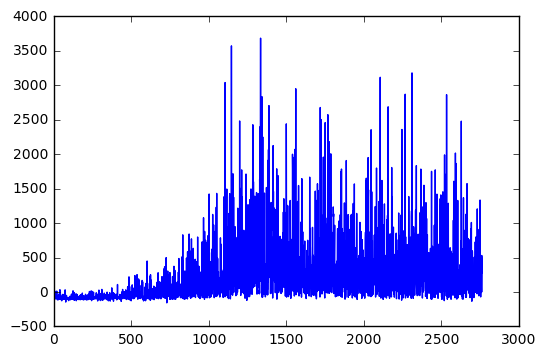

Ep: 2764 TS: 1200069 ES: 103 TR: -14.2297280904 Q 121.038434797
Ep: 2765 TS: 1201087 ES: 1017 TR: 770.296053602 Q 112.296606984
Ep: 2766 TS: 1201934 ES: 846 TR: 626.505874664 Q 122.507767937
Ep: 2767 TS: 1202424 ES: 489 TR: 222.407297431 Q 108.876654786
Ep: 2768 TS: 1202630 ES: 205 TR: 68.9839176337 Q 120.804033353
Ep: 2769 TS: 1202803 ES: 172 TR: 15.2412236356 Q 114.861468315
Ep: 2770 TS: 1204031 ES: 1227 TR: 965.990974137 Q 119.271347618
Ep: 2771 TS: 1204881 ES: 849 TR: 587.66044838 Q 119.641243808
Ep: 2772 TS: 1205173 ES: 291 TR: 140.800244994 Q 113.174773475
Ep: 2773 TS: 1206551 ES: 1377 TR: 987.579330634 Q 114.679146976
Ep: 2774 TS: 1207415 ES: 863 TR: 596.385086985 Q 114.60710015
Ep: 2775 TS: 1207636 ES: 220 TR: 48.9788255973 Q 106.906712757
Ep: 2776 TS: 1208234 ES: 597 TR: 394.304388764 Q 119.168731472
Ep: 2777 TS: 1208777 ES: 542 TR: 371.53224596 Q 120.273492869
Ep: 2778 TS: 1208968 ES: 190 TR: 25.0088441488 Q 110.04405374
Ep: 2779 TS: 1209171 ES: 202 TR: 35.4064770084 Q 107.63

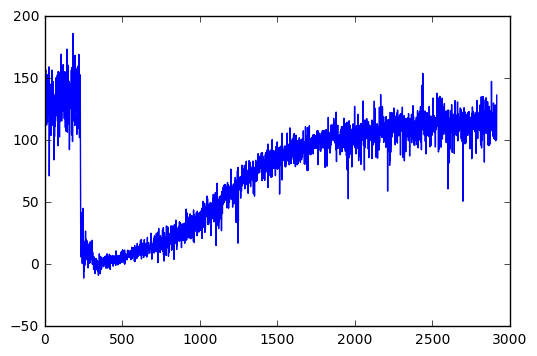

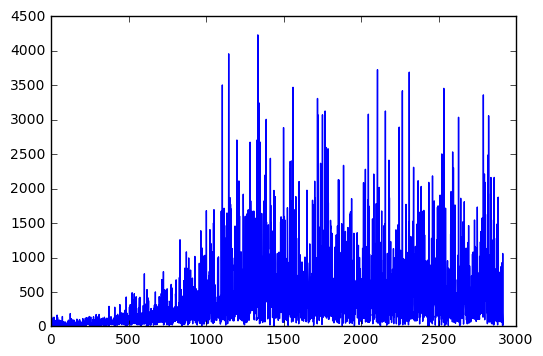

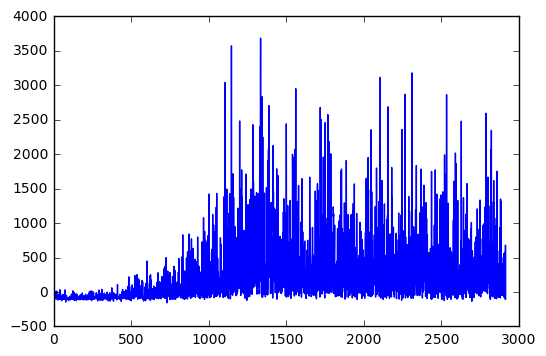

Ep: 2916 TS: 1300783 ES: 2405 TR: 1644.06635415 Q 107.495429682
Ep: 2917 TS: 1303026 ES: 2242 TR: 1664.95992139 Q 112.780467755
Ep: 2918 TS: 1303570 ES: 543 TR: 331.781987012 Q 117.309997306
Ep: 2919 TS: 1304189 ES: 618 TR: 351.50401827 Q 117.649837799
Ep: 2920 TS: 1304340 ES: 150 TR: 5.46578976595 Q 121.716653951
Ep: 2921 TS: 1304942 ES: 601 TR: 409.55371062 Q 119.211373574
Ep: 2922 TS: 1306113 ES: 1170 TR: 826.125700741 Q 114.194822238
Ep: 2923 TS: 1306131 ES: 17 TR: -104.035572592 Q 106.859344539
Ep: 2924 TS: 1306221 ES: 89 TR: -65.7102602358 Q 108.358949203
Ep: 2925 TS: 1306774 ES: 552 TR: 372.441508488 Q 119.249174132
Ep: 2926 TS: 1307446 ES: 671 TR: 344.373253735 Q 113.841085626
Ep: 2927 TS: 1307520 ES: 73 TR: -65.7754352055 Q 87.4492892696
Ep: 2928 TS: 1308419 ES: 898 TR: 700.751709652 Q 123.59021522
Ep: 2929 TS: 1308770 ES: 350 TR: 190.170718903 Q 125.351454454
Ep: 2930 TS: 1308892 ES: 121 TR: -0.670289622309 Q 121.383834271
Ep: 2931 TS: 1309771 ES: 878 TR: 622.015349576 Q 108.

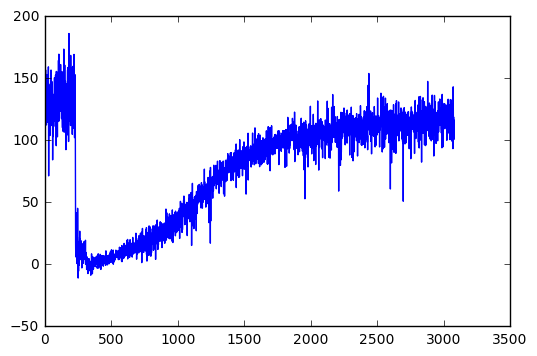

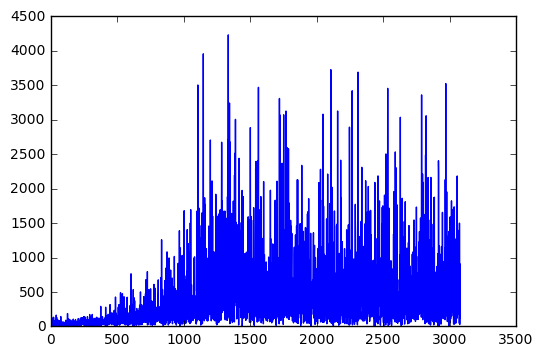

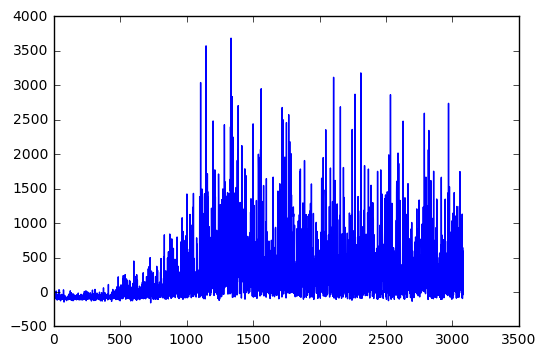

Ep: 3081 TS: 1400629 ES: 912 TR: 626.923460103 Q 119.691681191
Ep: 3082 TS: 1401708 ES: 1078 TR: 831.294576011 Q 118.285030453
Ep: 3083 TS: 1401985 ES: 276 TR: 77.9651323356 Q 106.713625687
Ep: 3084 TS: 1403686 ES: 1700 TR: 1312.19983843 Q 116.254823932
Ep: 3085 TS: 1404233 ES: 546 TR: 318.826557263 Q 125.710139257
Ep: 3086 TS: 1404959 ES: 725 TR: 454.008365835 Q 112.14264448
Ep: 3087 TS: 1405702 ES: 742 TR: 481.764090454 Q 120.792808426
Ep: 3088 TS: 1405945 ES: 242 TR: 59.276194883 Q 114.384731164
Ep: 3089 TS: 1406023 ES: 77 TR: -35.0538225925 Q 121.115367444
Ep: 3090 TS: 1406691 ES: 667 TR: 385.353289419 Q 111.720508441
Ep: 3091 TS: 1407205 ES: 513 TR: 307.307699731 Q 118.880751738
Ep: 3092 TS: 1407672 ES: 466 TR: 255.46354246 Q 118.58307836
Ep: 3093 TS: 1408291 ES: 618 TR: 388.493751663 Q 119.514337527
Ep: 3094 TS: 1408846 ES: 554 TR: 325.846741618 Q 121.416215766
Ep: 3095 TS: 1408999 ES: 152 TR: 42.4263048215 Q 122.018981733
Ep: 3096 TS: 1410141 ES: 1141 TR: 836.18024073 Q 116.8448

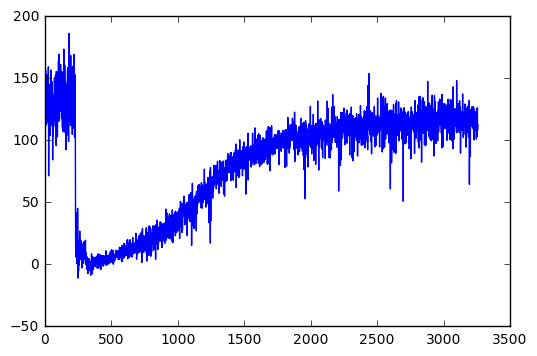

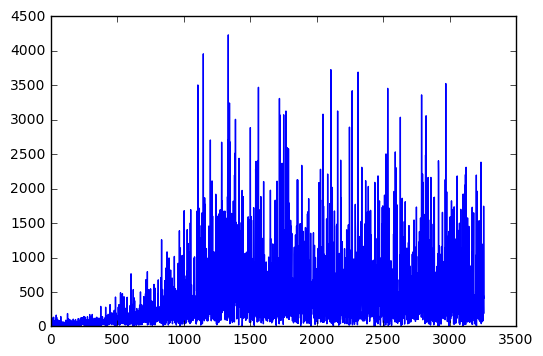

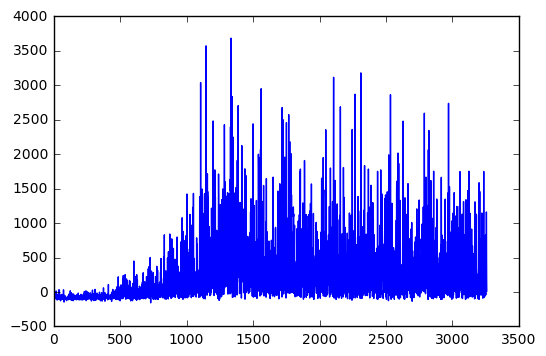

Ep: 3260 TS: 1500620 ES: 624 TR: 442.467922911 Q 116.760861476
Ep: 3261 TS: 1500689 ES: 68 TR: -51.7800006287 Q 120.138297698
Ep: 3262 TS: 1500938 ES: 248 TR: 94.1132786131 Q 120.796330979
Ep: 3263 TS: 1501010 ES: 71 TR: -67.434437112 Q 97.1171927922
Ep: 3264 TS: 1501481 ES: 470 TR: 263.479396662 Q 122.919383232
Ep: 3265 TS: 1502526 ES: 1044 TR: 632.571694988 Q 110.39218982
Ep: 3266 TS: 1503556 ES: 1029 TR: 719.475276919 Q 116.807685715
Ep: 3267 TS: 1504019 ES: 462 TR: 134.305405857 Q 111.316871587
Ep: 3268 TS: 1504028 ES: 8 TR: -101.275882118 Q 157.712422371
Ep: 3269 TS: 1504402 ES: 373 TR: 174.819420916 Q 111.38538784
Ep: 3270 TS: 1505290 ES: 887 TR: 588.780588994 Q 114.641307298
Ep: 3271 TS: 1505454 ES: 163 TR: 8.75935876202 Q 120.966837643
Ep: 3272 TS: 1505519 ES: 64 TR: -59.678249135 Q 117.422663033
Ep: 3273 TS: 1507546 ES: 2026 TR: 1496.68928147 Q 113.126620991
Ep: 3274 TS: 1507742 ES: 195 TR: 21.8562677763 Q 122.734532894
Ep: 3275 TS: 1508700 ES: 957 TR: 537.293024851 Q 115.7543

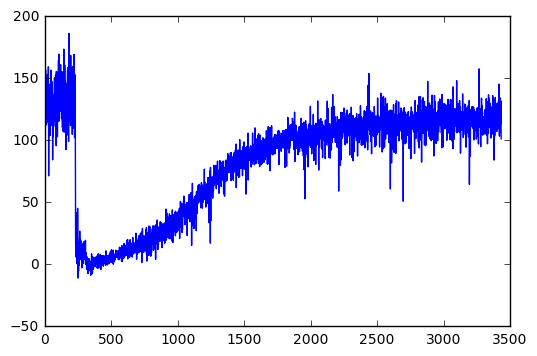

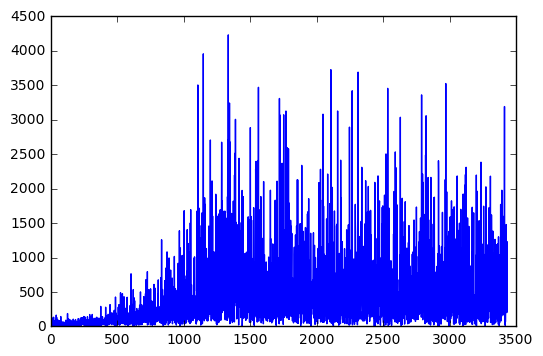

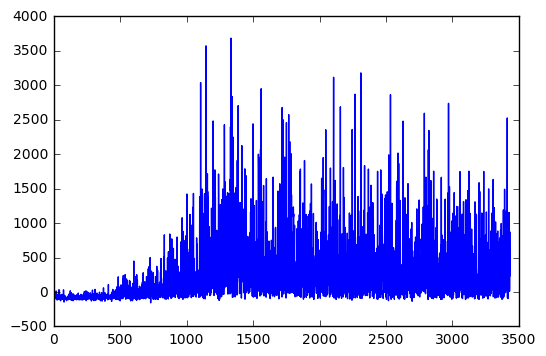

Ep: 3435 TS: 1600385 ES: 541 TR: 301.890917968 Q 111.269429334
Ep: 3436 TS: 1600926 ES: 540 TR: 361.418835334 Q 123.661117264
Ep: 3437 TS: 1601972 ES: 1045 TR: 682.511018493 Q 117.810638782
Ep: 3438 TS: 1602314 ES: 341 TR: 176.811450133 Q 120.614170639
Ep: 3439 TS: 1602599 ES: 284 TR: 54.1971928359 Q 95.0970090703
Ep: 3440 TS: 1602859 ES: 259 TR: 110.481743121 Q 113.580926975
Ep: 3441 TS: 1603916 ES: 1056 TR: 687.903829391 Q 107.17036474
Ep: 3442 TS: 1604563 ES: 646 TR: 433.388686673 Q 115.024969745
Ep: 3443 TS: 1604806 ES: 242 TR: 90.8548073241 Q 122.750542656
Ep: 3444 TS: 1605239 ES: 432 TR: 155.392222884 Q 112.975287403
Ep: 3445 TS: 1605336 ES: 96 TR: -27.0342478021 Q 109.085801999
Ep: 3446 TS: 1605423 ES: 86 TR: -59.1909937704 Q 123.442933859
Ep: 3447 TS: 1605783 ES: 359 TR: 163.576796413 Q 120.446101134
Ep: 3448 TS: 1606525 ES: 741 TR: 459.534207726 Q 108.836190516
Ep: 3449 TS: 1606601 ES: 75 TR: -51.597561041 Q 92.6137665176
Ep: 3450 TS: 1606611 ES: 9 TR: -103.974738128 Q 105.716

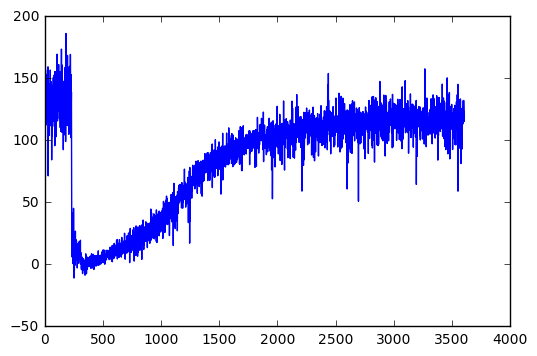

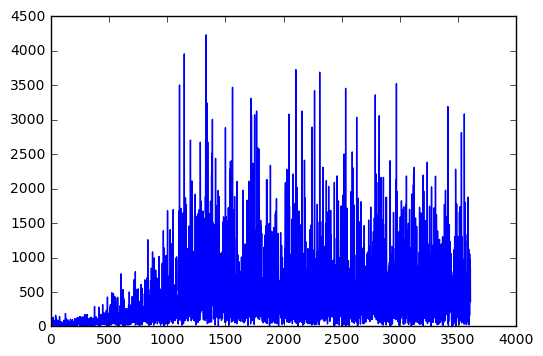

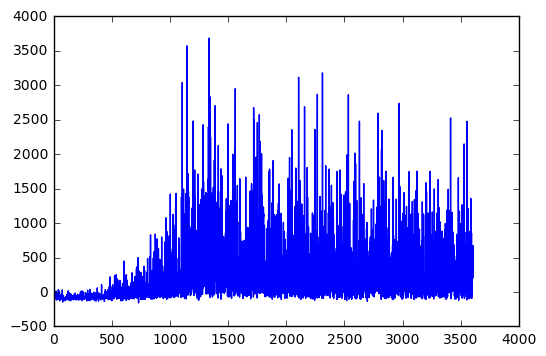

Ep: 3609 TS: 1700177 ES: 1088 TR: 827.12912958 Q 122.794455819
Ep: 3610 TS: 1700965 ES: 787 TR: 402.446304662 Q 111.134467995
Ep: 3611 TS: 1701110 ES: 144 TR: 6.92370954491 Q 137.827723636
Ep: 3612 TS: 1701449 ES: 338 TR: 74.1363384891 Q 107.138866306
Ep: 3613 TS: 1702601 ES: 1151 TR: 695.20398626 Q 110.165866495
Ep: 3614 TS: 1704866 ES: 2264 TR: 1550.84510019 Q 113.335009876
Ep: 3615 TS: 1705764 ES: 897 TR: 591.348837733 Q 113.112787002
Ep: 3616 TS: 1706376 ES: 611 TR: 387.376729317 Q 124.962238537
Ep: 3617 TS: 1707086 ES: 709 TR: 400.695809429 Q 115.040892721
Ep: 3618 TS: 1708034 ES: 947 TR: 633.232171526 Q 110.087554641
Ep: 3619 TS: 1708680 ES: 645 TR: 399.001704636 Q 109.62996144
Ep: 3620 TS: 1709181 ES: 500 TR: 291.758870788 Q 123.802209068
Ep: 3621 TS: 1709437 ES: 255 TR: 33.0713976381 Q 103.658232456
Ep: 3622 TS: 1710254 ES: 816 TR: 598.731523746 Q 121.527317145
Ep: 3623 TS: 1710322 ES: 67 TR: -72.4000817778 Q 87.3847230655
Ep: 3624 TS: 1713470 ES: 3147 TR: 2154.03693148 Q 116.6

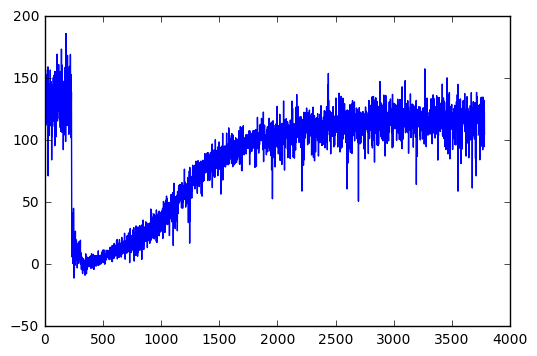

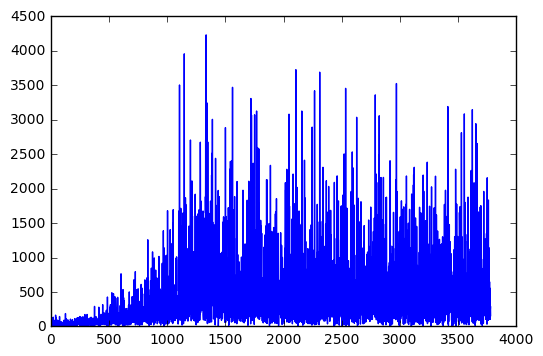

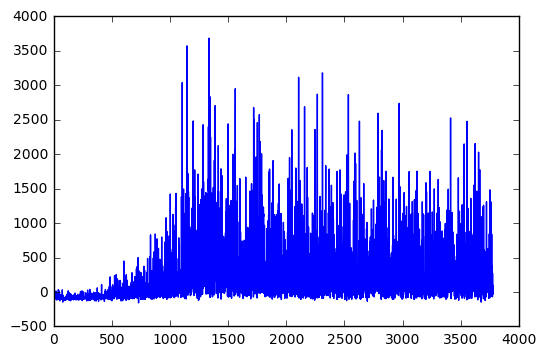

Ep: 3782 TS: 1800222 ES: 242 TR: 113.327760858 Q 125.819769773
Ep: 3783 TS: 1800389 ES: 166 TR: -0.72102353641 Q 111.263161969
Ep: 3784 TS: 1800742 ES: 352 TR: 173.711504034 Q 118.701497295
Ep: 3785 TS: 1801899 ES: 1156 TR: 679.498923185 Q 112.322091775
Ep: 3786 TS: 1802406 ES: 506 TR: 251.438872094 Q 123.194995345
Ep: 3787 TS: 1803411 ES: 1004 TR: 676.198861724 Q 110.392681323
Ep: 3788 TS: 1804852 ES: 1440 TR: 949.283214356 Q 114.891989982
Ep: 3789 TS: 1805537 ES: 684 TR: 336.765906579 Q 110.839796483
Ep: 3790 TS: 1806510 ES: 972 TR: 587.836913508 Q 109.784126671
Ep: 3791 TS: 1806803 ES: 292 TR: 79.0265544664 Q 109.94311353
Ep: 3792 TS: 1808608 ES: 1804 TR: 1217.57463693 Q 117.040428843
Ep: 3793 TS: 1809263 ES: 654 TR: 377.620992534 Q 124.017809509
Ep: 3794 TS: 1809546 ES: 282 TR: 33.3983511111 Q 118.916866925
Ep: 3795 TS: 1811325 ES: 1778 TR: 1049.59262393 Q 108.594219931
Ep: 3796 TS: 1812668 ES: 1342 TR: 913.369389062 Q 117.988241447
Ep: 3797 TS: 1812803 ES: 134 TR: -11.8142529332 Q

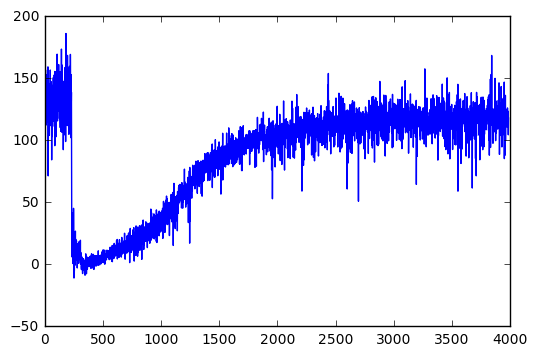

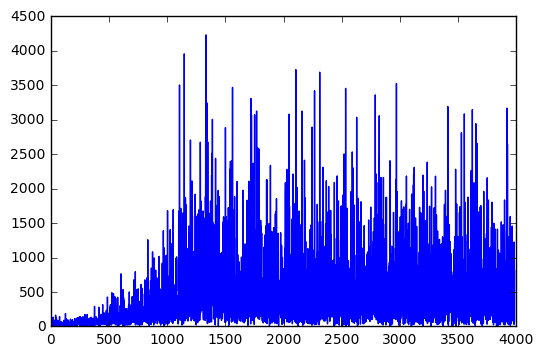

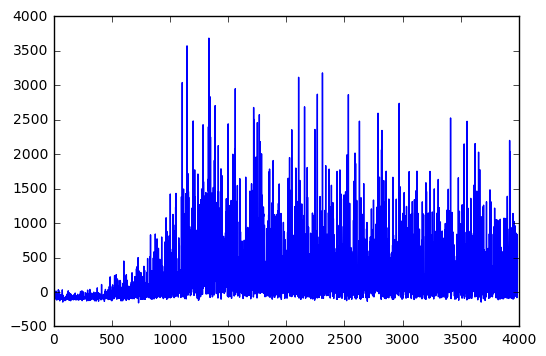

Ep: 3989 TS: 1900225 ES: 1143 TR: 709.795318821 Q 100.778611488
Ep: 3990 TS: 1900624 ES: 398 TR: 224.475528665 Q 124.300119338
Ep: 3991 TS: 1903223 ES: 2598 TR: 1809.25114794 Q 112.678369242
Ep: 3992 TS: 1903348 ES: 124 TR: -16.782567856 Q 123.985983695
Ep: 3993 TS: 1904148 ES: 799 TR: 558.038999231 Q 121.273754092
Ep: 3994 TS: 1904724 ES: 575 TR: 332.895641687 Q 115.162063167
Ep: 3995 TS: 1905945 ES: 1220 TR: 836.564622012 Q 116.763637604
Ep: 3996 TS: 1905985 ES: 39 TR: -79.2287311311 Q 147.587876149
Ep: 3997 TS: 1906401 ES: 415 TR: 186.293224299 Q 111.234897619
Ep: 3998 TS: 1906794 ES: 392 TR: 214.569379051 Q 116.715100464
Ep: 3999 TS: 1907098 ES: 303 TR: 106.738185701 Q 112.684536144
Ep: 4000 TS: 1907143 ES: 44 TR: -88.8889726805 Q 113.995073665
Ep: 4001 TS: 1907159 ES: 15 TR: -100.788527176 Q 136.616163127
Ep: 4002 TS: 1907323 ES: 163 TR: 11.4464896843 Q 116.217912686
Ep: 4003 TS: 1907773 ES: 449 TR: 241.629620602 Q 110.748933331
Ep: 4004 TS: 1907902 ES: 128 TR: -25.8625313974 Q 10

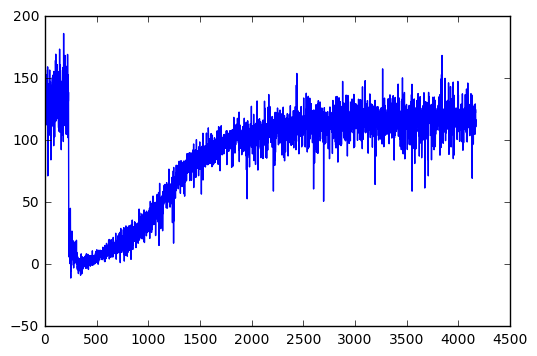

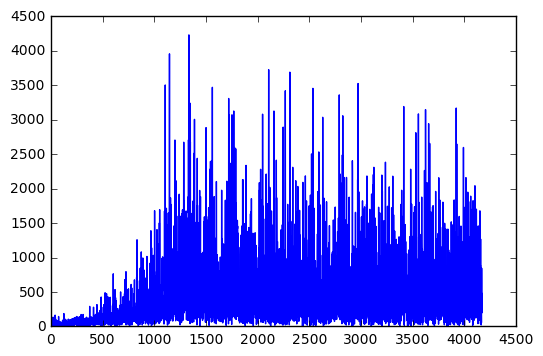

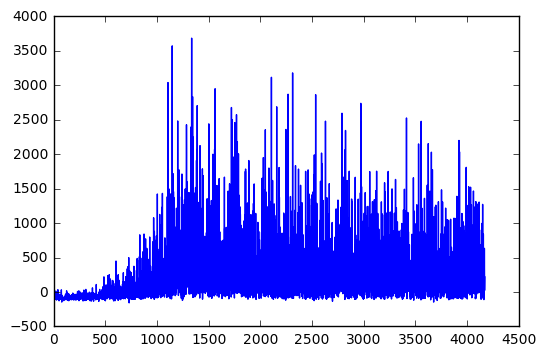

Ep: 4172 TS: 2000431 ES: 880 TR: 515.478704892 Q 116.562488464
Ep: 4173 TS: 2000783 ES: 351 TR: 170.490886821 Q 124.545899329
Ep: 4174 TS: 2001349 ES: 565 TR: 326.848990428 Q 116.120065126
Ep: 4175 TS: 2003649 ES: 2299 TR: 1815.4896307 Q 119.536422712
Ep: 4176 TS: 2003856 ES: 206 TR: 23.6028179083 Q 108.932057853
Ep: 4177 TS: 2004776 ES: 919 TR: 620.333554664 Q 117.129563685
Ep: 4178 TS: 2005648 ES: 871 TR: 601.339695303 Q 117.940068739
Ep: 4179 TS: 2005670 ES: 21 TR: -109.891934446 Q 93.3605682736
Ep: 4180 TS: 2006096 ES: 425 TR: 255.307592392 Q 128.058661894
Ep: 4181 TS: 2006169 ES: 72 TR: -86.2573514852 Q 78.0351297359
Ep: 4182 TS: 2006213 ES: 43 TR: -89.9292313532 Q 122.169181646
Ep: 4183 TS: 2006568 ES: 354 TR: 212.855687989 Q 124.84095915
Ep: 4184 TS: 2006648 ES: 79 TR: -58.3975577159 Q 122.511939858
Ep: 4185 TS: 2006755 ES: 106 TR: -32.4247076515 Q 112.656892844
Ep: 4186 TS: 2006803 ES: 47 TR: -63.0275705382 Q 147.993885771
Ep: 4187 TS: 2007099 ES: 295 TR: 142.385337843 Q 126.31

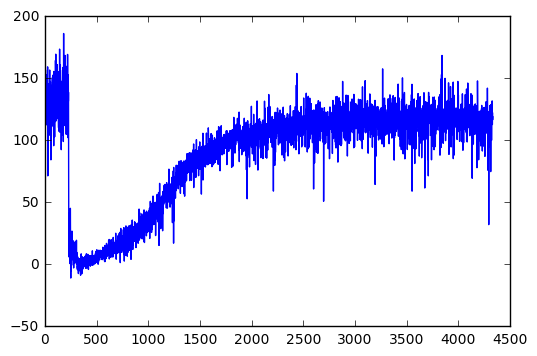

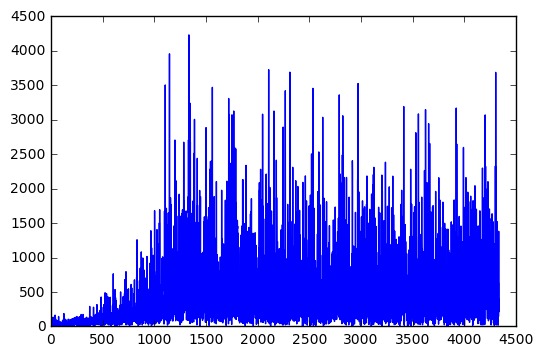

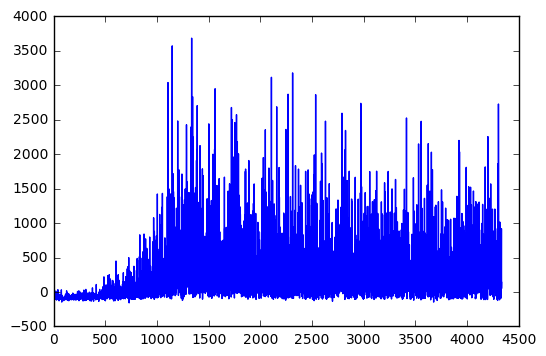

Ep: 4335 TS: 2100385 ES: 979 TR: 460.799268215 Q 105.325093895
Ep: 4336 TS: 2100941 ES: 555 TR: 272.061606424 Q 119.41609667
Ep: 4337 TS: 2101042 ES: 100 TR: -50.136685976 Q 110.272046561
Ep: 4338 TS: 2101782 ES: 739 TR: 369.667762876 Q 110.929252444
Ep: 4339 TS: 2102660 ES: 877 TR: 451.133130193 Q 112.957752839
Ep: 4340 TS: 2103825 ES: 1164 TR: 690.881877247 Q 120.457380135
Ep: 4341 TS: 2103943 ES: 117 TR: -27.3775747639 Q 125.165049349
Ep: 4342 TS: 2105281 ES: 1337 TR: 848.733987332 Q 115.28284427
Ep: 4343 TS: 2105401 ES: 119 TR: -20.5381632727 Q 118.958623133
Ep: 4344 TS: 2106146 ES: 744 TR: 401.686905429 Q 116.562146383
Ep: 4345 TS: 2106184 ES: 37 TR: -76.9497616832 Q 126.595438158
Ep: 4346 TS: 2106541 ES: 356 TR: 141.611606265 Q 114.813624505
Ep: 4347 TS: 2106823 ES: 281 TR: 111.848802108 Q 119.014769734
Ep: 4348 TS: 2107111 ES: 287 TR: 127.697109872 Q 117.163248016
Ep: 4349 TS: 2107161 ES: 49 TR: -62.8988899898 Q 125.718871292
Ep: 4350 TS: 2107401 ES: 239 TR: 49.9207309395 Q 113.

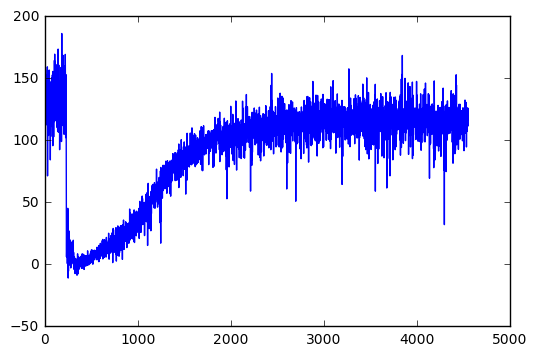

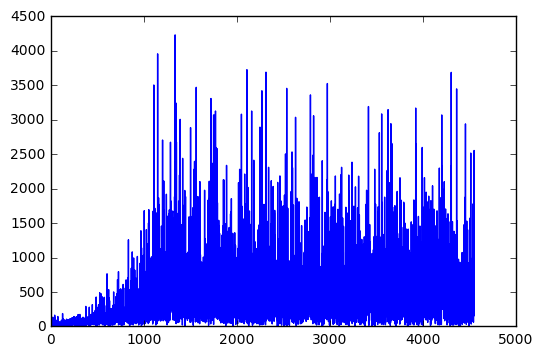

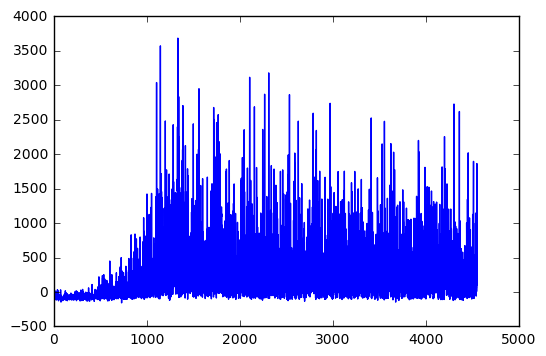

Ep: 4552 TS: 2200736 ES: 1069 TR: 697.218774183 Q 116.464935254
Ep: 4553 TS: 2201698 ES: 961 TR: 611.001790618 Q 116.512395091
Ep: 4554 TS: 2203522 ES: 1823 TR: 1312.75032605 Q 115.599117112
Ep: 4555 TS: 2204718 ES: 1195 TR: 812.855581879 Q 113.576205388
Ep: 4556 TS: 2205397 ES: 678 TR: 401.747973135 Q 117.80707124
Ep: 4557 TS: 2206295 ES: 897 TR: 585.966493582 Q 109.44332992
Ep: 4558 TS: 2206961 ES: 665 TR: 409.595227217 Q 120.416606255
Ep: 4559 TS: 2208073 ES: 1111 TR: 734.41392672 Q 122.795302211
Ep: 4560 TS: 2208377 ES: 303 TR: 103.12538474 Q 114.944693694
Ep: 4561 TS: 2210782 ES: 2404 TR: 1964.29950477 Q 124.730913511
Ep: 4562 TS: 2212074 ES: 1291 TR: 850.843265323 Q 115.382922063
Ep: 4563 TS: 2212924 ES: 849 TR: 583.157265298 Q 116.687008406
Ep: 4564 TS: 2213574 ES: 649 TR: 315.782597549 Q 118.691394171
Ep: 4565 TS: 2214436 ES: 861 TR: 568.274010836 Q 122.635495981
Ep: 4566 TS: 2214913 ES: 476 TR: 263.400771292 Q 110.891807443
Ep: 4567 TS: 2215155 ES: 241 TR: 92.8806217575 Q 131.

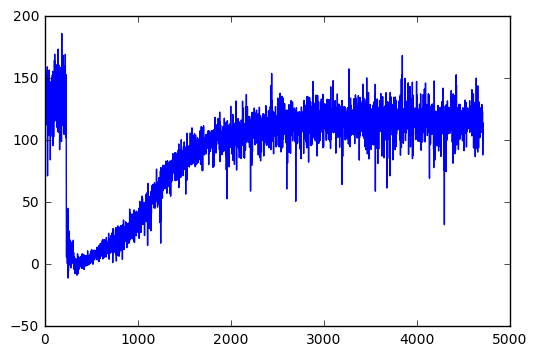

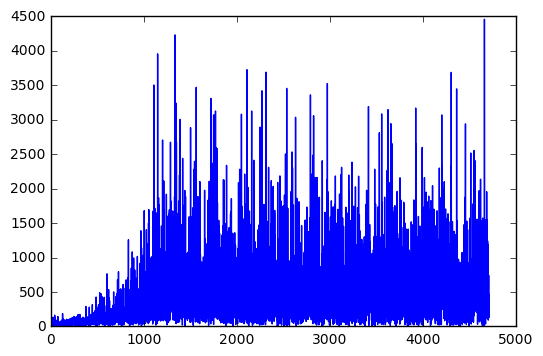

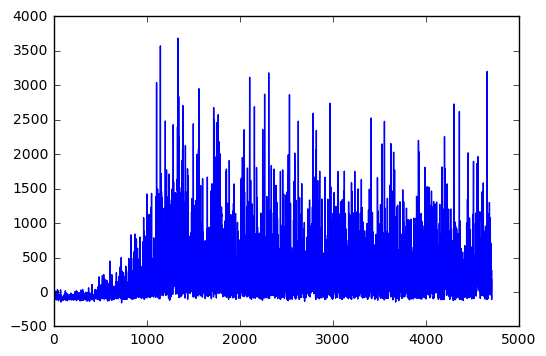

Ep: 4711 TS: 2300294 ES: 822 TR: 474.269321728 Q 119.457977462
Ep: 4712 TS: 2300716 ES: 421 TR: 220.388550969 Q 109.668079931
Ep: 4713 TS: 2301467 ES: 750 TR: 482.234393122 Q 112.755204501
Ep: 4714 TS: 2302603 ES: 1135 TR: 739.384896603 Q 113.522284692
Ep: 4715 TS: 2302632 ES: 28 TR: -91.2883187383 Q 130.202664784
Ep: 4716 TS: 2302921 ES: 288 TR: 104.531614676 Q 115.948254987
Ep: 4717 TS: 2303347 ES: 425 TR: 162.723997789 Q 109.487882776
Ep: 4718 TS: 2303925 ES: 577 TR: 272.85884175 Q 106.03524614
Ep: 4719 TS: 2304310 ES: 384 TR: 169.317680842 Q 119.201101672
Ep: 4720 TS: 2304756 ES: 445 TR: 174.458320992 Q 107.519820131
Ep: 4721 TS: 2305077 ES: 320 TR: 110.923521168 Q 119.535606682
Ep: 4722 TS: 2305530 ES: 452 TR: 162.780999037 Q 104.921258689
Ep: 4723 TS: 2305814 ES: 283 TR: 85.4890634823 Q 114.307955332
Ep: 4724 TS: 2306146 ES: 331 TR: 100.290975691 Q 104.651136854
Ep: 4725 TS: 2307061 ES: 914 TR: 654.984146086 Q 127.325950865
Ep: 4726 TS: 2308107 ES: 1045 TR: 631.673232522 Q 110.84

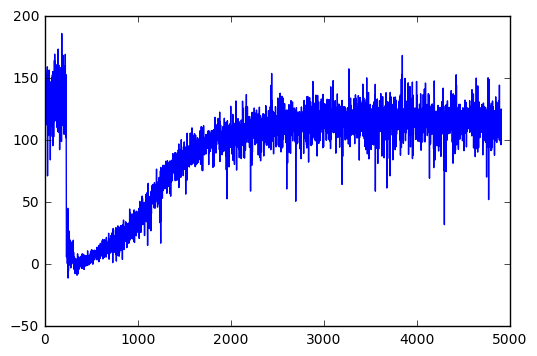

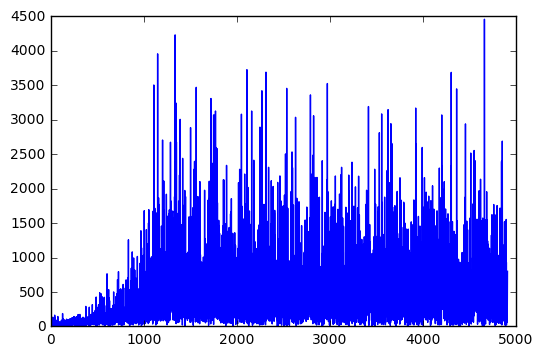

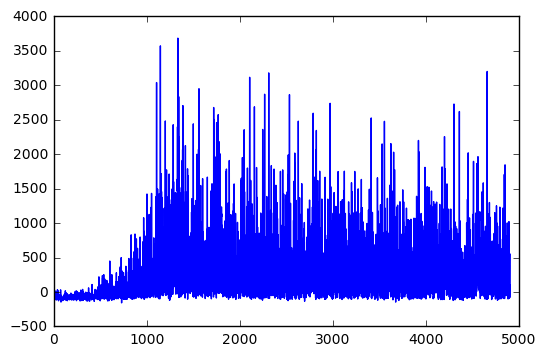

Ep: 4909 TS: 2400074 ES: 912 TR: 622.931366411 Q 117.450195789
Ep: 4910 TS: 2400231 ES: 156 TR: 39.0248960912 Q 123.126721993
Ep: 4911 TS: 2400791 ES: 559 TR: 351.623354004 Q 124.914532298
Ep: 4912 TS: 2401322 ES: 530 TR: 259.63690115 Q 113.740774791
Ep: 4913 TS: 2403158 ES: 1835 TR: 1283.21787965 Q 119.995039472
Ep: 4914 TS: 2404730 ES: 1571 TR: 1152.59032127 Q 122.710179975
Ep: 4915 TS: 2405974 ES: 1243 TR: 839.924135833 Q 110.543095513
Ep: 4916 TS: 2406115 ES: 140 TR: -0.570599728186 Q 128.912451662
Ep: 4917 TS: 2406681 ES: 565 TR: 268.071969766 Q 108.332576098
Ep: 4918 TS: 2407162 ES: 480 TR: 263.439765159 Q 126.584130756
Ep: 4919 TS: 2407461 ES: 298 TR: 59.5495612162 Q 110.968509527
Ep: 4920 TS: 2407598 ES: 136 TR: 3.94188085856 Q 118.724124291
Ep: 4921 TS: 2408083 ES: 484 TR: 186.309243614 Q 117.810972626
Ep: 4922 TS: 2408219 ES: 135 TR: -7.28796319591 Q 101.065870017
Ep: 4923 TS: 2408311 ES: 91 TR: -93.6641747066 Q 97.5472868406
Ep: 4924 TS: 2408599 ES: 287 TR: 139.327031273 Q 1

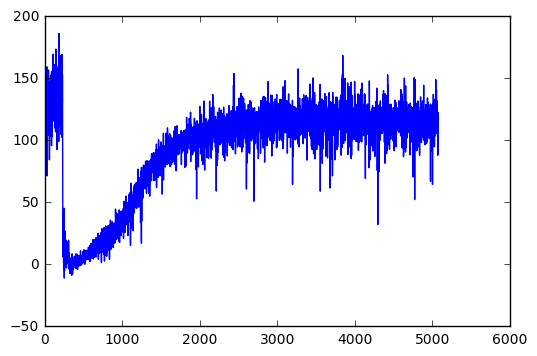

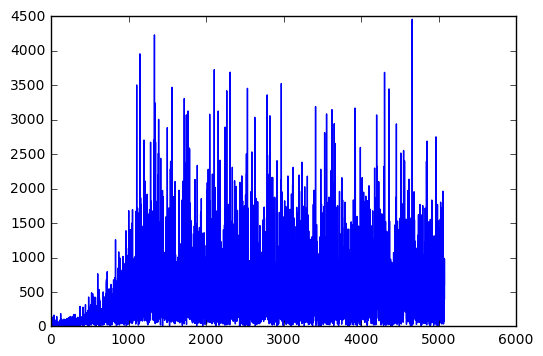

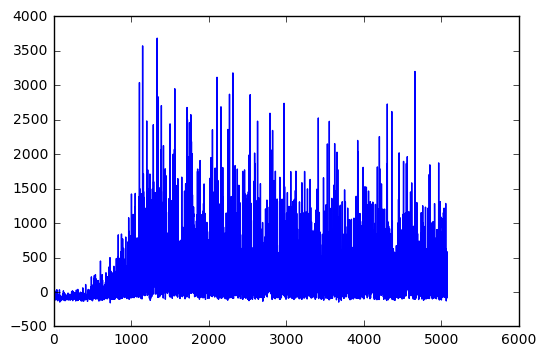

Ep: 5078 TS: 2500360 ES: 696 TR: 350.911561505 Q 110.748273718
Ep: 5079 TS: 2500742 ES: 381 TR: 110.966864493 Q 99.6535974872
Ep: 5080 TS: 2501461 ES: 718 TR: 356.044007519 Q 116.942685922
Ep: 5081 TS: 2501927 ES: 465 TR: 237.098400498 Q 108.812641698
Ep: 5082 TS: 2502239 ES: 311 TR: 132.665919802 Q 124.172336075
Ep: 5083 TS: 2503569 ES: 1329 TR: 953.945330602 Q 122.453227566
Ep: 5084 TS: 2503834 ES: 264 TR: 8.51839213309 Q 107.513445151
Ep: 5085 TS: 2504237 ES: 402 TR: 163.344419307 Q 117.094845839
Ep: 5086 TS: 2504417 ES: 179 TR: 25.27800936 Q 130.747599064
Ep: 5087 TS: 2505403 ES: 985 TR: 671.645571861 Q 118.105857424
Ep: 5088 TS: 2506235 ES: 831 TR: 437.924392478 Q 109.782546129
Ep: 5089 TS: 2506269 ES: 33 TR: -83.3729920847 Q 146.881085251
Ep: 5090 TS: 2506515 ES: 245 TR: 82.9087380722 Q 130.714857561
Ep: 5091 TS: 2508982 ES: 2466 TR: 1798.42733745 Q 115.642344635
Ep: 5092 TS: 2509015 ES: 32 TR: -73.7835200749 Q 138.697629452
Ep: 5093 TS: 2509185 ES: 169 TR: -16.4343771334 Q 120.8

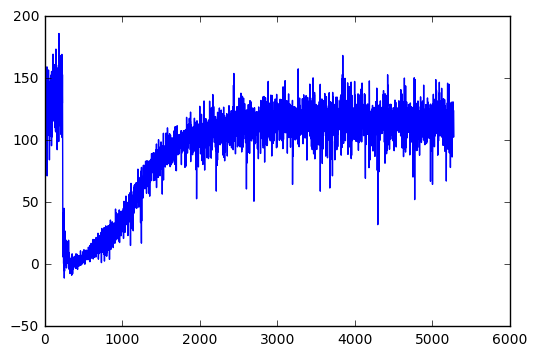

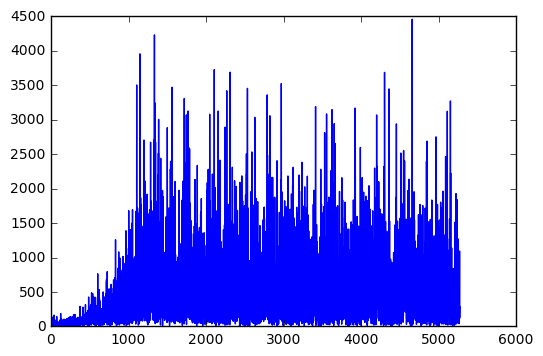

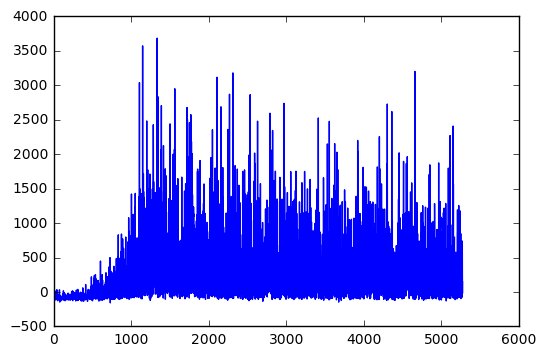

Ep: 5275 TS: 2600881 ES: 1057 TR: 726.046000714 Q 120.032253803
Ep: 5276 TS: 2601110 ES: 228 TR: 69.1944866868 Q 126.340755831
Ep: 5277 TS: 2602192 ES: 1081 TR: 774.982945474 Q 117.582471281
Ep: 5278 TS: 2602618 ES: 425 TR: 97.6037448878 Q 108.56419051
Ep: 5279 TS: 2603082 ES: 463 TR: 214.45741031 Q 109.128941226
Ep: 5280 TS: 2603516 ES: 433 TR: 220.82415535 Q 113.80818703
Ep: 5281 TS: 2603547 ES: 30 TR: -82.6336055601 Q 116.365431341
Ep: 5282 TS: 2606893 ES: 3345 TR: 2625.56413398 Q 111.100385451
Ep: 5283 TS: 2606988 ES: 94 TR: -24.6362006192 Q 116.349723654
Ep: 5284 TS: 2607184 ES: 195 TR: 23.3010221914 Q 99.7769733771
Ep: 5285 TS: 2607224 ES: 39 TR: -73.6776905532 Q 135.803024096
Ep: 5286 TS: 2607404 ES: 179 TR: 5.41294623576 Q 102.917884893
Ep: 5287 TS: 2607738 ES: 333 TR: 179.149527789 Q 119.259373333
Ep: 5288 TS: 2608004 ES: 265 TR: 99.6249452063 Q 121.592199791
Ep: 5289 TS: 2610024 ES: 2019 TR: 1248.5381606 Q 108.520445765
Ep: 5290 TS: 2610296 ES: 271 TR: 74.6013605258 Q 111.073

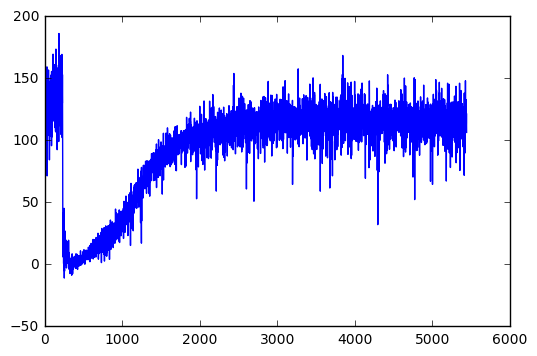

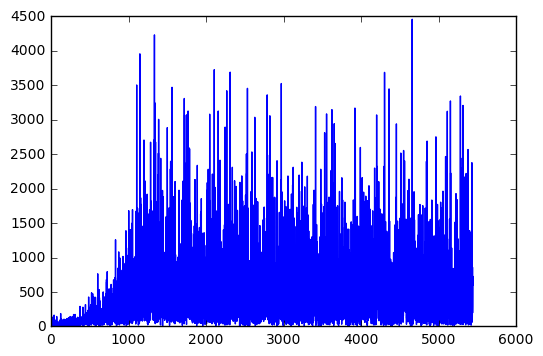

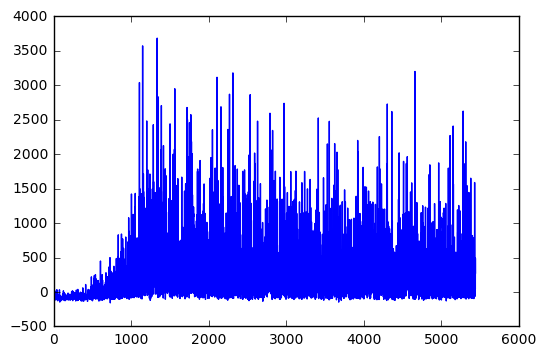

Ep: 5442 TS: 2700910 ES: 2550 TR: 1738.63110195 Q 109.849269917
Ep: 5443 TS: 2701129 ES: 218 TR: 77.0383881706 Q 123.653173359
Ep: 5444 TS: 2701517 ES: 387 TR: 225.514597762 Q 121.080360876
Ep: 5445 TS: 2702140 ES: 622 TR: 266.36698406 Q 103.676488438
Ep: 5446 TS: 2702244 ES: 103 TR: -33.8534948049 Q 100.543202632
Ep: 5447 TS: 2702970 ES: 725 TR: 255.728263976 Q 99.4284809981
Ep: 5448 TS: 2704054 ES: 1083 TR: 545.713258542 Q 106.706489265
Ep: 5449 TS: 2704633 ES: 578 TR: 337.972951378 Q 116.408019102
Ep: 5450 TS: 2705122 ES: 488 TR: 244.277958566 Q 116.734723142
Ep: 5451 TS: 2706383 ES: 1260 TR: 736.028917121 Q 111.010498796
Ep: 5452 TS: 2706418 ES: 34 TR: -93.2796882528 Q 101.423128465
Ep: 5453 TS: 2707100 ES: 681 TR: 406.103446997 Q 111.373804597
Ep: 5454 TS: 2707169 ES: 68 TR: -79.1202395119 Q 85.4682369828
Ep: 5455 TS: 2707923 ES: 753 TR: 383.022091582 Q 110.276317569
Ep: 5456 TS: 2708476 ES: 552 TR: 268.217127327 Q 115.645185849
Ep: 5457 TS: 2709581 ES: 1104 TR: 719.148233776 Q 11

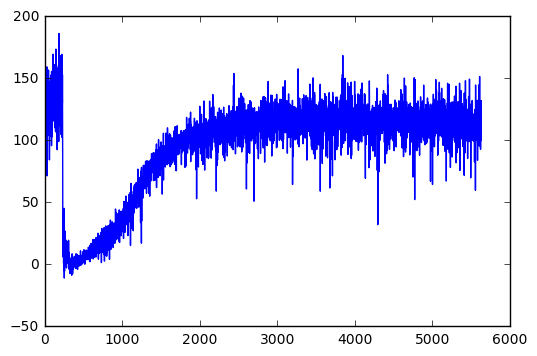

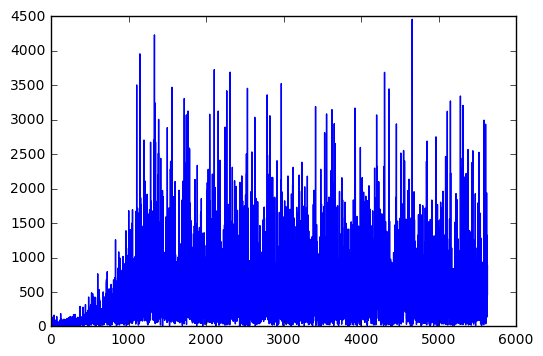

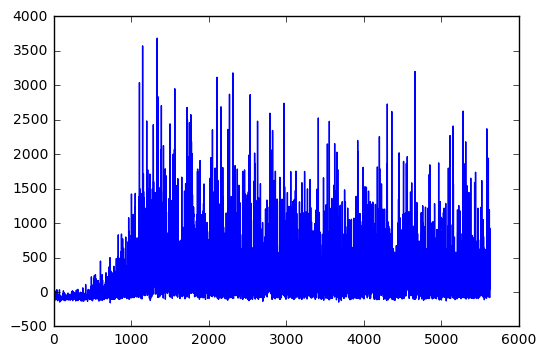

Ep: 5632 TS: 2801031 ES: 1134 TR: 746.664319068 Q 117.823228309
Ep: 5633 TS: 2801411 ES: 379 TR: 175.968220884 Q 112.497325367
Ep: 5634 TS: 2802183 ES: 771 TR: 545.528623023 Q 123.382821901
Ep: 5635 TS: 2802341 ES: 157 TR: 26.0264342065 Q 111.058355142
Ep: 5636 TS: 2803057 ES: 715 TR: 455.297802451 Q 120.969470428
Ep: 5637 TS: 2803194 ES: 136 TR: -34.2992541931 Q 103.241349508
Ep: 5638 TS: 2804021 ES: 826 TR: 513.756197302 Q 109.539277343
Ep: 5639 TS: 2804344 ES: 322 TR: 79.9517120895 Q 108.910037639
Ep: 5640 TS: 2804733 ES: 388 TR: 162.378350244 Q 117.565246744
Ep: 5641 TS: 2805475 ES: 741 TR: 367.629403012 Q 107.773354287
Ep: 5642 TS: 2807378 ES: 1902 TR: 1176.52663122 Q 108.239662638
Ep: 5643 TS: 2807435 ES: 56 TR: -57.8864232527 Q 140.758036886
Ep: 5644 TS: 2808276 ES: 840 TR: 576.376770281 Q 120.45240855
Ep: 5645 TS: 2808645 ES: 368 TR: 191.223825661 Q 111.67089921
Ep: 5646 TS: 2809978 ES: 1332 TR: 887.567022085 Q 107.381818935
Ep: 5647 TS: 2810544 ES: 565 TR: 294.745476784 Q 112.

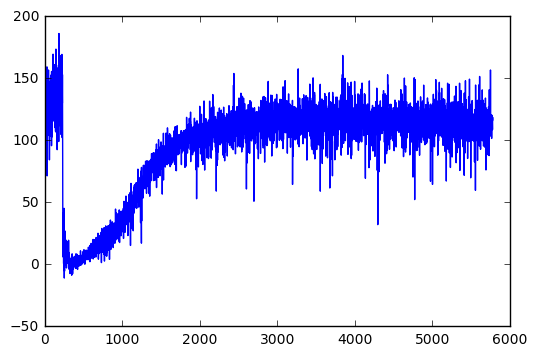

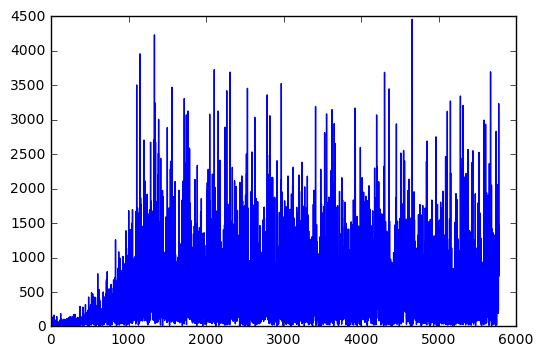

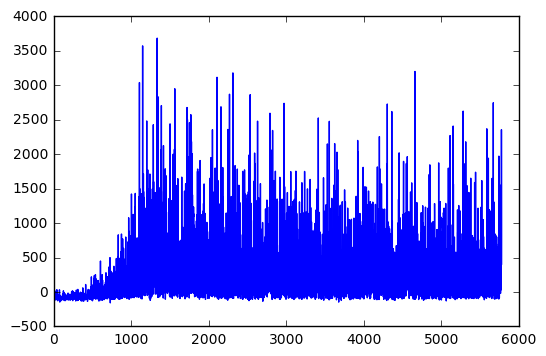

Ep: 5779 TS: 2900024 ES: 367 TR: 111.650778481 Q 108.012449241
Ep: 5780 TS: 2901463 ES: 1438 TR: 947.92140952 Q 119.063494219
Ep: 5781 TS: 2902466 ES: 1002 TR: 659.474603668 Q 119.070753718
Ep: 5782 TS: 2904434 ES: 1967 TR: 1448.20254672 Q 118.739659079
Ep: 5783 TS: 2906133 ES: 1698 TR: 992.933233755 Q 108.689533307
Ep: 5784 TS: 2906527 ES: 393 TR: 187.700331716 Q 117.475769094
Ep: 5785 TS: 2907231 ES: 703 TR: 519.010516385 Q 127.387934092
Ep: 5786 TS: 2907530 ES: 298 TR: 57.3818387783 Q 108.116418339
Ep: 5787 TS: 2908076 ES: 545 TR: 309.259927438 Q 114.273975157
Ep: 5788 TS: 2908459 ES: 382 TR: 195.549782128 Q 110.564554025
Ep: 5789 TS: 2908988 ES: 528 TR: 209.847279109 Q 108.785331703
Ep: 5790 TS: 2909024 ES: 35 TR: -82.1719323858 Q 123.572294181
Ep: 5791 TS: 2909985 ES: 960 TR: 599.060174934 Q 110.860716585
Ep: 5792 TS: 2910045 ES: 59 TR: -69.2159489524 Q 138.397768053
Ep: 5793 TS: 2910228 ES: 182 TR: 48.9078025762 Q 123.897551924
Ep: 5794 TS: 2910290 ES: 61 TR: -67.2782491932 Q 103

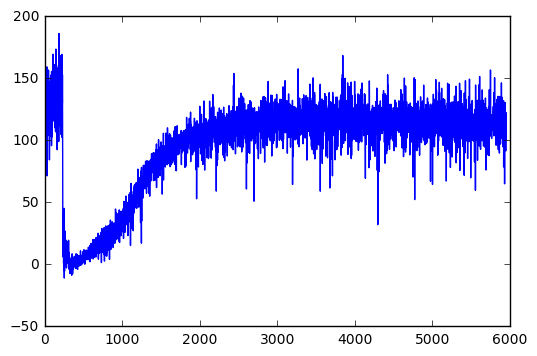

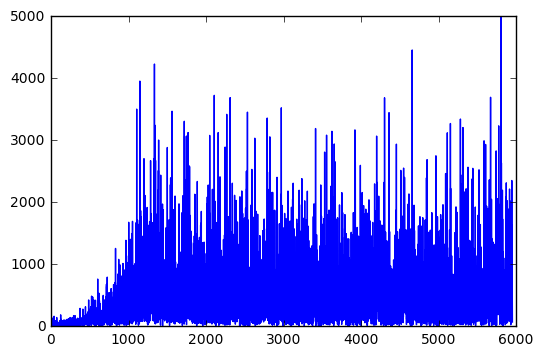

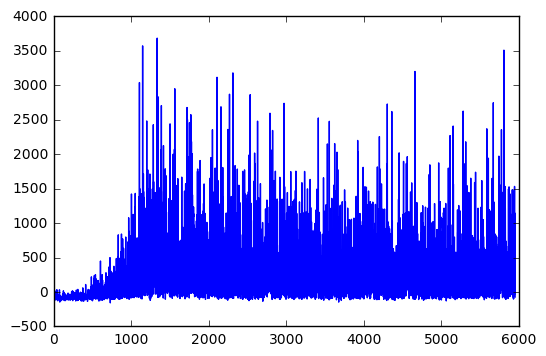

Ep: 5954 TS: 3000635 ES: 731 TR: 282.517519966 Q 102.522858353
Ep: 5955 TS: 3000666 ES: 30 TR: -97.2851327192 Q 128.209755452
Ep: 5956 TS: 3000769 ES: 102 TR: -6.64034070053 Q 137.22666819
Ep: 5957 TS: 3002769 ES: 1999 TR: 1309.26278706 Q 111.837381006
Ep: 5958 TS: 3002957 ES: 187 TR: 41.3649741339 Q 122.58875701
Ep: 5959 TS: 3002987 ES: 29 TR: -90.5156301412 Q 125.785278649
Ep: 5960 TS: 3004026 ES: 1038 TR: 681.257429285 Q 115.132486118
Ep: 5961 TS: 3004237 ES: 210 TR: 30.5027087577 Q 109.76720265
Ep: 5962 TS: 3004480 ES: 242 TR: 56.6080280687 Q 112.251475184
Ep: 5963 TS: 3005939 ES: 1458 TR: 946.472235385 Q 110.078251445
Ep: 5964 TS: 3005985 ES: 45 TR: -78.4025180374 Q 117.19127121
Ep: 5965 TS: 3006305 ES: 319 TR: 100.31214014 Q 112.796274012
Ep: 5966 TS: 3006873 ES: 567 TR: 339.863649207 Q 123.144579517
Ep: 5967 TS: 3007507 ES: 633 TR: 364.721219463 Q 114.943224969
Ep: 5968 TS: 3007900 ES: 392 TR: 181.213493246 Q 100.04780267
Ep: 5969 TS: 3008217 ES: 316 TR: 166.256563081 Q 128.1026

In [5]:
# start Training
sess = tf.Session()
sess.run(init)
for episode in range(num_episodes):
    episodeBuffer = experience_buffer()
    # reset environment and get first observation
    sim = MazeSimulator(settings)
    s = sim.observe()
    d = False
    rAll = 0
    sum_maxQ = 0
    for simstep in range(num_maxsteps):
        # generate action
        if np.random.rand(1) < e or total_steps < pre_train_steps:
            a = np.random.randint(0, 5)
        else:
            a = sess.run(mainQN.predict,feed_dict={mainQN.ob_input:[s]})[0]
        # record Q-values
        Q = sess.run(mainQN.Qout, feed_dict={mainQN.ob_input:[s]})[0]
        
        #avgQ = np.sum(Q)/5.0
        maxQ = np.max(Q)
        sum_maxQ += maxQ
        
        sim.perform_action(a)
        sim.step(0.1)
        s1 = sim.observe()
        r = sim.collect_reward(0, s1)

        # show 
        if simstep % ShowInterval == 0:
            #sim.draw([total_steps])
            pass

        # save model
        if total_steps % 100000 == 0:
            saver.save(sess, 'AvoidNet_OneFrame_NNew_' + str(total_steps/100000) + '.cptk')
            print('Model Saved at total step:', total_steps)
            plt.plot(QList)
            plt.show()
            plt.plot(jList)
            plt.show()
            plt.plot(rList)
            plt.show()
        total_steps += 1
        d = sim.GameOver
        # save to experience buffer
        episodeBuffer.add(np.reshape(np.array([s,a,r,s1,d]),[1,5]))

        if total_steps > pre_train_steps:
            if e > endE:
                e -= stepDrop
            if total_steps % (update_freq) == 0:
                # get random batch of experience
                trainBatch = myBuffer.sample(batch_size)
                # Perform the Double-DQN update to the target Q-values
                Q1 = sess.run(mainQN.predict,feed_dict={mainQN.ob_input:np.vstack(trainBatch[:,3])})
                Q2 = sess.run(targetQN.Qout,feed_dict={targetQN.ob_input:np.vstack(trainBatch[:,3])})
                end_multiplier = -(trainBatch[:,4] - 1)
                doubleQ = Q2[range(batch_size),Q1]
                targetQ = trainBatch[:,2] + (y*doubleQ * end_multiplier)
                # update the network with our target values
                _ = sess.run(mainQN.updateModel, feed_dict={ mainQN.ob_input:np.vstack(trainBatch[:,0]),
                                                             mainQN.targetQ:targetQ, 
                                                             mainQN.actions:trainBatch[:,1]})
                # update the target network in the direction of the primary network
                updateTarget(targetOps, sess)
        rAll += r
        s = s1
        if sim.GameOver:
            break
    print('Ep:', episode, 'TS:', total_steps, 'ES:', simstep, 'TR:', rAll, 'Q', sum_maxQ/simstep)
    # END of one episode    

    # get all experience from this episode and discount their rewards
    myBuffer.add(episodeBuffer.buffer)
    jList.append(simstep)
    rList.append(rAll)
    QList.append(sum_maxQ/simstep)
# END of all episode

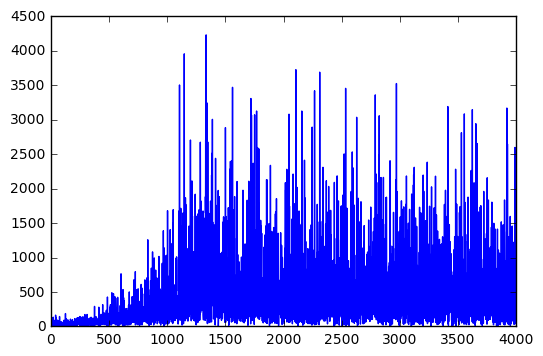

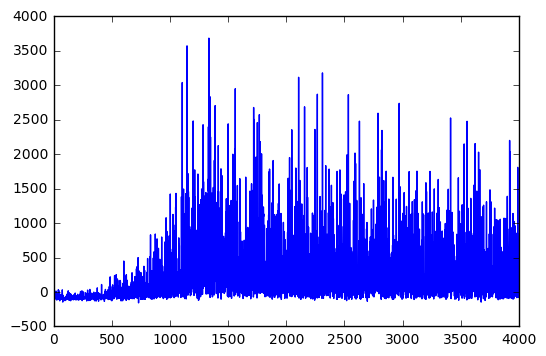

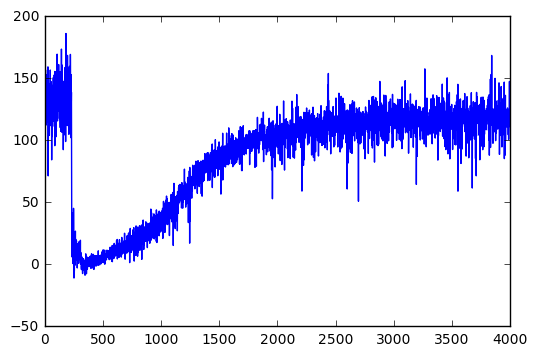

In [6]:
# Check Learning Results   
plt.plot(jList[0:4000])
plt.show()
plt.plot(rList[0:4000])
plt.show()
plt.plot(QList[0:4000])
plt.show()

In [7]:
import pprint, pickle
output = open('jhist_OneFrame_NNew.pkl', 'wb')
pickle.dump(jList, output)
output.close()
output = open('rhist_OneFrame_NNew.pkl', 'wb')
pickle.dump(rList, output)
output.close()
output = open('qhist_OneFrame_NNew.pkl', 'wb')
pickle.dump(QList, output)
output.close()